In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression  #1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier     #2
from sklearn.svm import SVC

from catboost import CatBoostClassifier       #3
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None 

In [2]:
file_path = "C:/Users/tugru/Desktop/Superstoredata.xlsx"

In [3]:
df = pd.read_excel(file_path, sheet_name="sheet1")

In [4]:
df.head()

Order_ID Order_Date Shipment_Date       Ship_Mode Customer_ID    Customer_Name    Segment             City       State Region       Product_ID  \
0  CA-2016-152156 2016-11-08    2016-11-11    Second Class    CG-12520      Claire Gute   Consumer        Henderson    Kentucky  South  FUR-BO-10001798   
1  CA-2016-152156 2016-11-08    2016-11-11    Second Class    CG-12520      Claire Gute   Consumer        Henderson    Kentucky  South  FUR-CH-10000454   
2  CA-2016-138688 2016-06-12    2016-06-16    Second Class    DV-13045  Darrin Van Huff  Corporate      Los Angeles  California   West  OFF-LA-10000240   
3  US-2015-108966 2015-10-11    2015-10-18  Standard Class    SO-20335   Sean O'Donnell   Consumer  Fort Lauderdale     Florida  South  FUR-TA-10000577   
4  US-2015-108966 2015-10-11    2015-10-18  Standard Class    SO-20335   Sean O'Donnell   Consumer  Fort Lauderdale     Florida  South  OFF-ST-10000760   

          Category Sub_Category                                       Product_Name   Sales  Quantity  Discount   Profit  Unit_Price  ProfitperUnit  CostperUnit  \
0        Furniture    Bookcases                  Bush Somerset Collection Bookcase 261.960         2     0.000   41.914     130.980         20.957      110.023   
1        Furniture       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,... 731.940         3     0.000  219.582     243.980         73.194      170.786   
2  Office Supplies       Labels  Self-Adhesive Address Labels for Typewriters b...  14.620         2     0.000    6.871       7.310          3.436        3.874   
3        Furniture       Tables      Bretford CR4500 Series Slim Rectangular Table 957.577         5     0.450 -172.606     191.516        -76.606      268.122   
4  Office Supplies      Storage                     Eldon Fold 'N Roll Cart System  22.368         2     0.200    2.516      11.184          1.258        9.926   

  PercentageofProfit Order_Month  Order_Year     Tenure  
0              19.0%    November        2016 2016-11-08  
1              42.9%    November        2016 2016-11-08  
2              88.7%        June        2016 2016-06-12  
3             -28.6%     October        2015 2015-10-11  
4              12.7%     October        2015 2015-10-11

In [5]:
df.shape

(9994, 25)

In [6]:
import missingno as msno

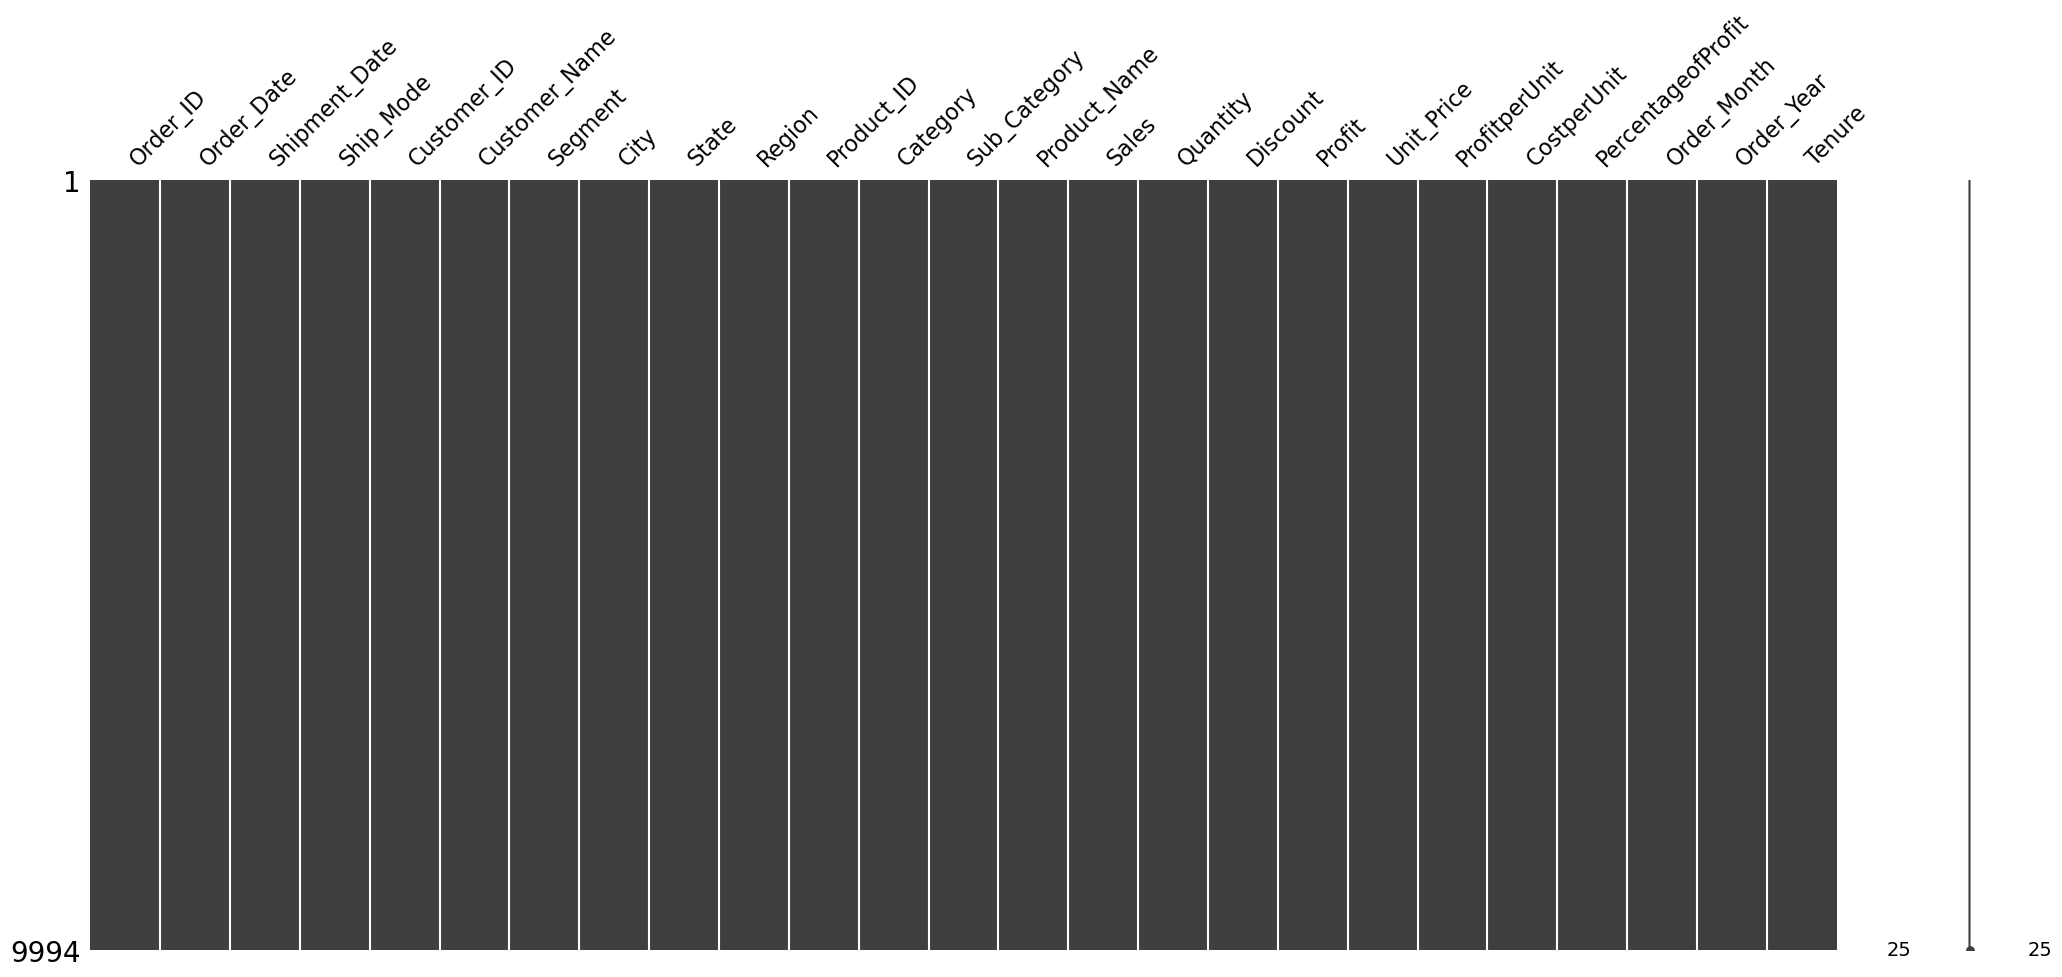

In [7]:
#checking missing values - no missing values in dataset
msno.matrix(df)
plt.show()

In [8]:
#veri setinin genel resmini verecek fonksiyonun oluşturulması
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Info #####################")
    print(dataframe.info())
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

In [9]:
#veri setinin genel resmi
check_df(df)

##################### Shape #####################
(9994, 25)
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_ID            9994 non-null   object        
 1   Order_Date          9994 non-null   datetime64[ns]
 2   Shipment_Date       9994 non-null   datetime64[ns]
 3   Ship_Mode           9994 non-null   object        
 4   Customer_ID         9994 non-null   object        
 5   Customer_Name       9994 non-null   object        
 6   Segment             9994 non-null   object        
 7   City                9994 non-null   object        
 8   State               9994 non-null   object        
 9   Region              9994 non-null   object        
 10  Product_ID          9994 non-null   object        
 11  Category            9994 non-null   object        

## EDA (Keşifçi Veri Analizi)


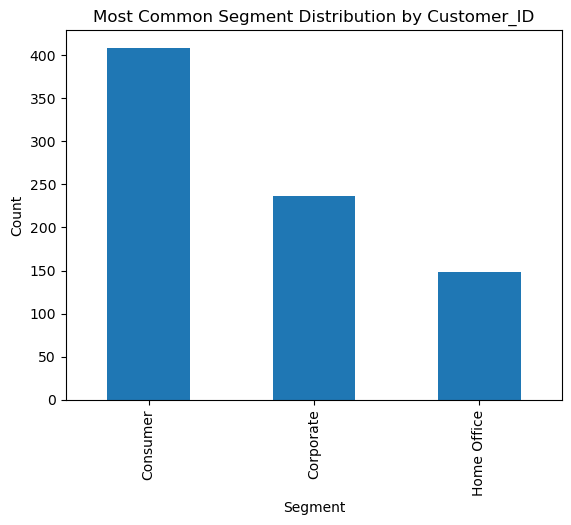

In [10]:
# Customer_ID'ye göre gruplandırma ve her müşteri için en yaygın segmenti bulma
most_common_segments = df.groupby("Customer_ID")["Segment"].agg(lambda x: x.value_counts().idxmax())

# En yaygın segmentlerin dağılımını hesaplama
segment_distribution = most_common_segments.value_counts()


segment_distribution.plot(kind="bar")
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Most Common Segment Distribution by Customer_ID')
plt.show()

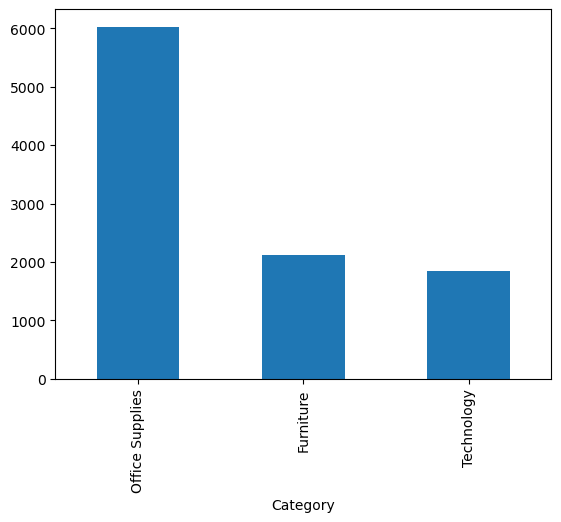

In [11]:
#Sistemde kayıtlı olan satılan ürünlere ait kategorilerin dağılımı
df["Category"].value_counts().plot(kind="bar")
plt.show()

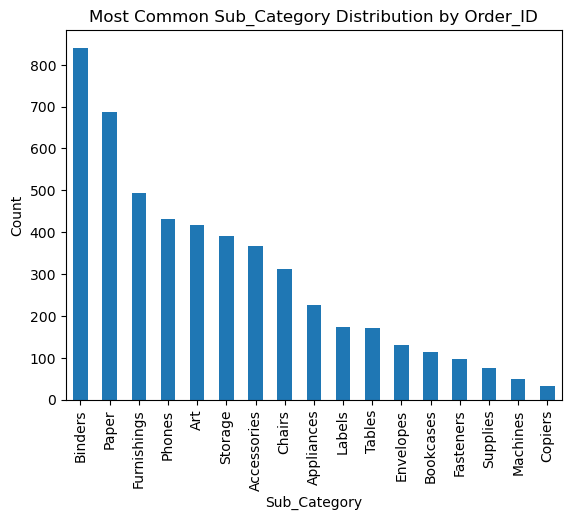

In [12]:
most_common_subcategories = df.groupby("Order_ID")["Sub_Category"].agg(lambda x: x.value_counts().idxmax())

# En yaygın Sub_Category'lerin dağılımını hesaplama
subcategory_distribution = most_common_subcategories.value_counts()

# Dağılımı bar grafikte görselleştirme
subcategory_distribution.plot(kind="bar")
plt.xlabel('Sub_Category')
plt.ylabel('Count')
plt.title('Most Common Sub_Category Distribution by Order_ID')
plt.show()

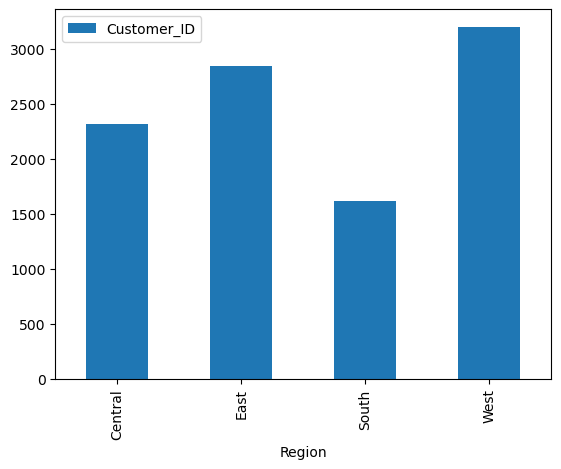

In [13]:
#Müşteri adetlerinin bölgelere göre dağılımı
customer_count_by_region = df.groupby("Region").agg({"Customer_ID":"count"})
customer_count_by_region.plot(kind="bar")
plt.show()

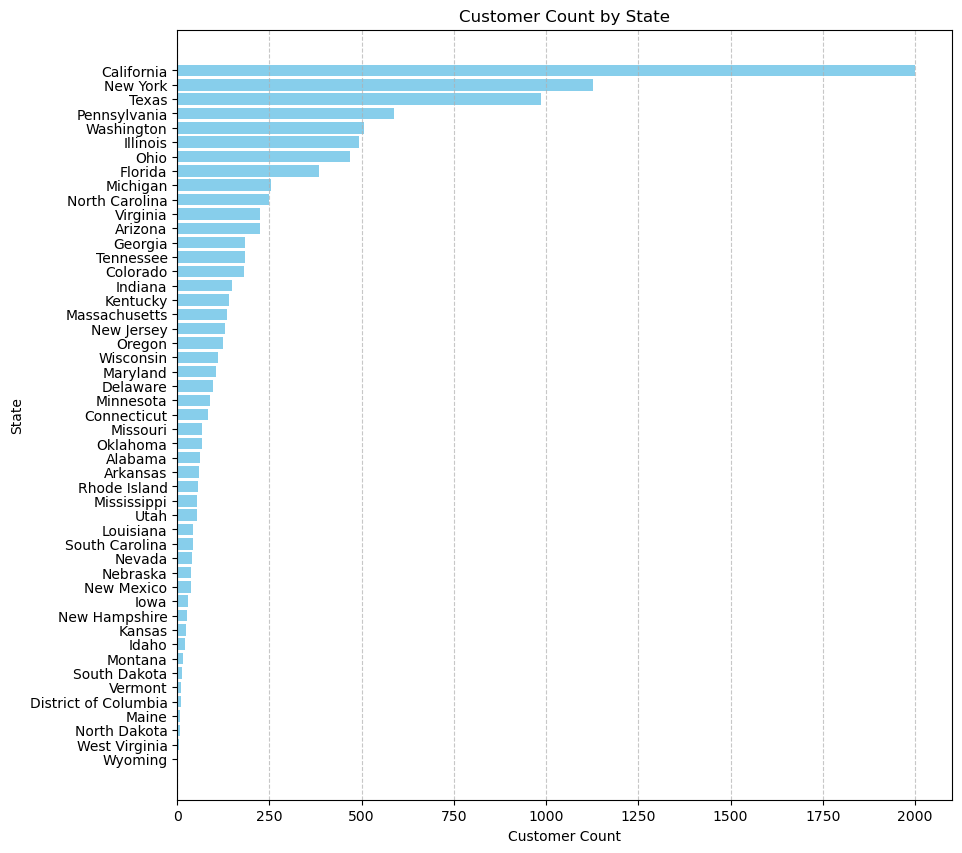

In [14]:
#Müşteri adetlerinin eyaletlere göre dağılımı
customer_count_by_state = df.groupby("State").agg({"Customer_ID":"count"}).reset_index()
customer_count_by_state.columns = ["State", "Customer_Count"]
customer_count_by_state_sorted = customer_count_by_state.sort_values(by='Customer_Count', ascending=True)
plt.figure(figsize=(10, 10))
plt.barh(customer_count_by_state_sorted['State'], customer_count_by_state_sorted['Customer_Count'], color='skyblue')
plt.xlabel('Customer Count')
plt.ylabel('State')
plt.title('Customer Count by State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

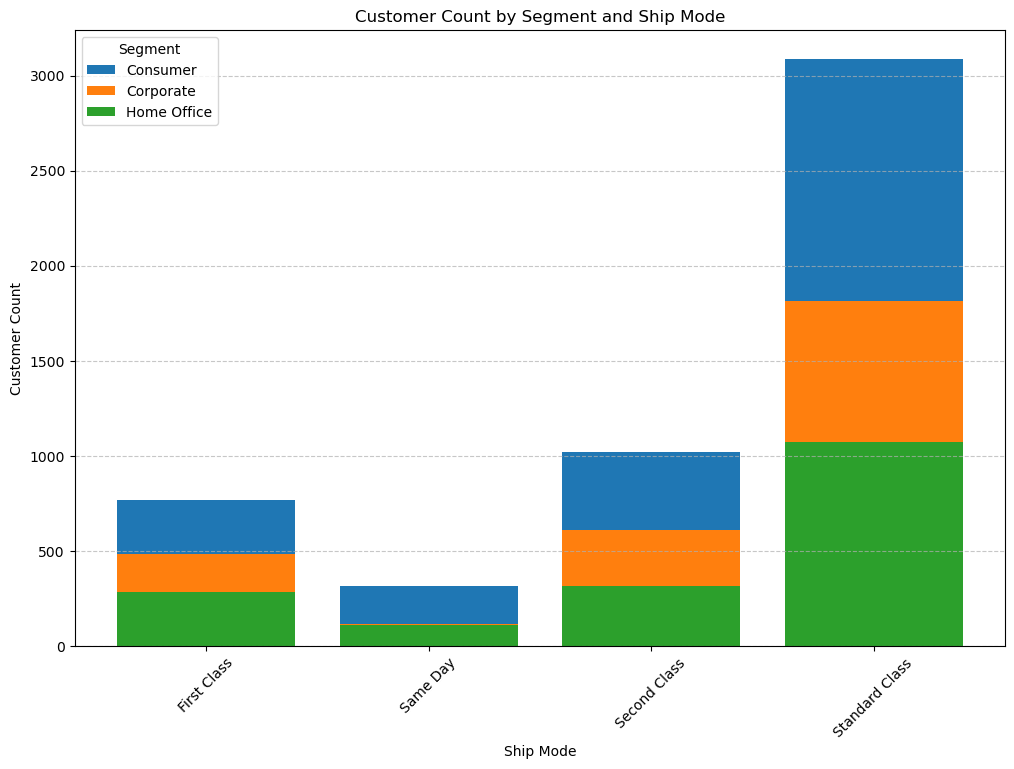

In [15]:
#Shipmode ve Segment kırılımında müşteri adetleri
customer_count_by_segment_and_shipmode = df.groupby(["Segment", "Ship_Mode"]).agg({"Customer_ID": "count"}).reset_index()
customer_count_by_segment_and_shipmode.columns = ['Segment', 'Ship_Mode', 'Customer_Count']
plt.figure(figsize=(12, 8))
for segment in customer_count_by_segment_and_shipmode['Segment'].unique():
    segment_data = customer_count_by_segment_and_shipmode[customer_count_by_segment_and_shipmode['Segment'] == segment]
    plt.bar(segment_data['Ship_Mode'], segment_data['Customer_Count'], label=segment)

plt.xlabel('Ship Mode')
plt.ylabel('Customer Count')
plt.title('Customer Count by Segment and Ship Mode')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

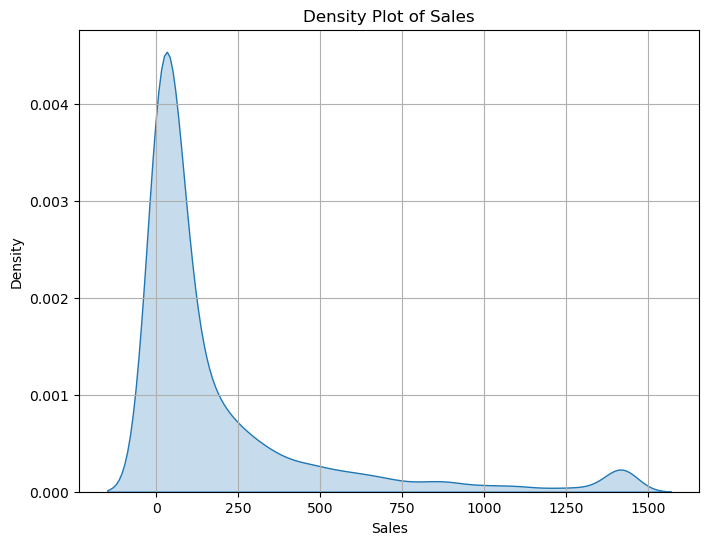

In [16]:
#Sales değişkeninin dağılımı
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Sales'], shade=True)
plt.title('Density Plot of Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.grid(True)
plt.show()

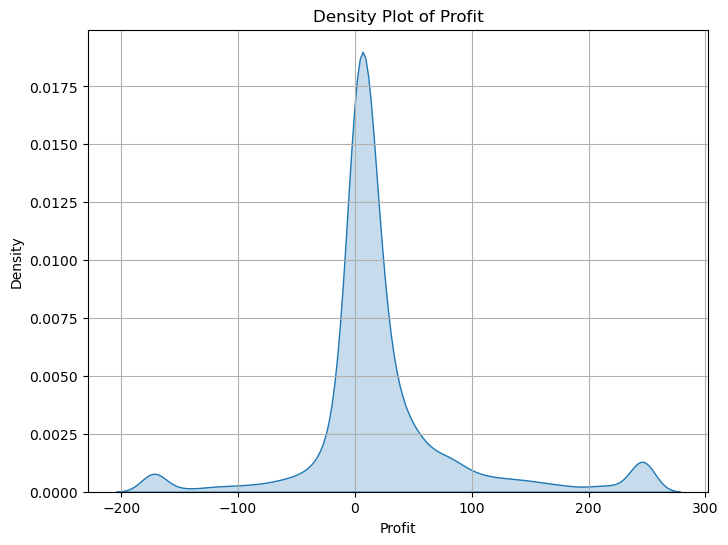

In [17]:
#Profit değişkeninin dağılımı
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Profit"], shade=True)
plt.title("Density Plot of Profit")
plt.xlabel("Profit")
plt.ylabel("Density")
plt.grid(True)
plt.show()

*  Yukarıdaki grafikte görüldüğü üzere karlılık bazı gözlemler için negatif değerde olmaktadır. Bu indirimler hangi ürünlere uygulandı ?

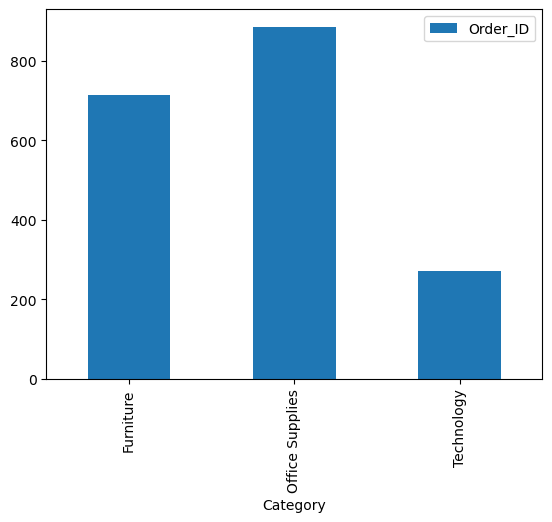

In [18]:
neg_profit = df[df["Profit"] < 0]
neg_profit.groupby("Category").agg({"Order_ID":"count"}).plot(kind="bar")
plt.show()

* Zarar ettiğimiz işlemlerde hangi ürünlere ortalama ne kadar indirim yapılıyor ?

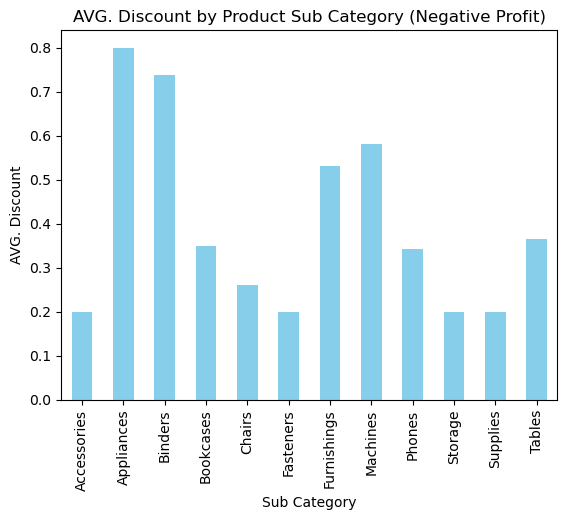

In [19]:
avg_discount_per_sub = neg_profit.groupby("Sub_Category")["Discount"].mean()
avg_discount_per_sub.plot(kind="bar", color="skyblue")
plt.xlabel("Sub Category")
plt.ylabel("AVG. Discount")
plt.title("AVG. Discount by Product Sub Category (Negative Profit)")
plt.xticks()
plt.show()

* Bu işlemlerde sezonsallık mevcut mu ? (Kampanya Veya İndirim Dönemleri)

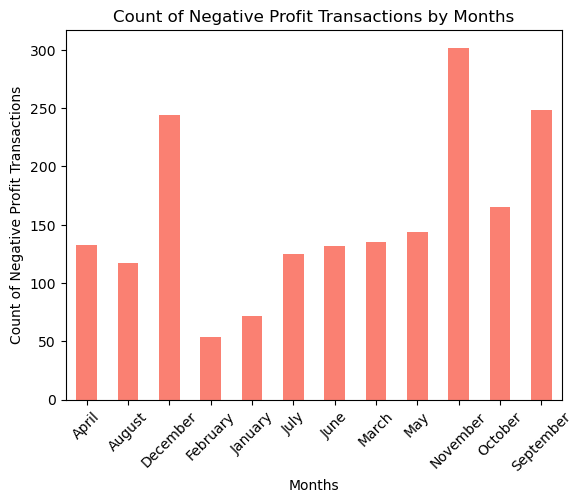

In [20]:
neg_profit_by_month = neg_profit["Order_Month"].value_counts().sort_index()

neg_profit_by_month.plot(kind="bar", color="salmon")

plt.xlabel("Months")
plt.ylabel("Count of Negative Profit Transactions")
plt.title("Count of Negative Profit Transactions by Months")
plt.xticks(rotation=45)
plt.show()

Yukarıdaki grafikte Kasım Eylül ve Aralık aylarında daha çok zararına satış yapıldığı görülmekte. Bu da aşağıdaki aylara göre toplam satış grafiğinde Kasım Eylük ve Aralık aylarındaki satışlarda görülen sezonsal artışı açıklamaktadır.

* Satışların yıllara göre değişimi

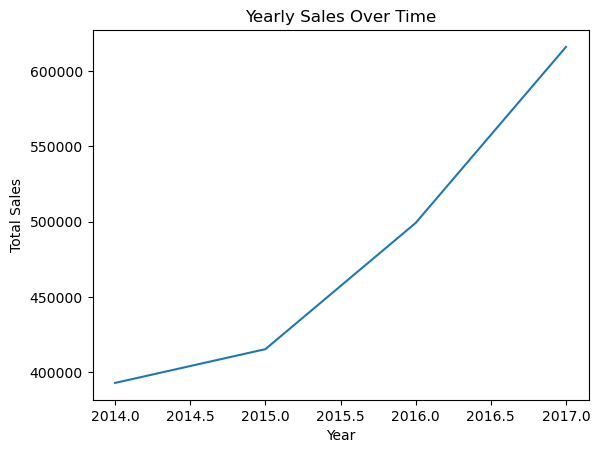

In [21]:
yearly_sales = df.groupby("Order_Year")["Sales"].sum()
yearly_sales.plot(kind="line")
plt.title("Yearly Sales Over Time")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.show()

* Satışların aylara göre değişimi

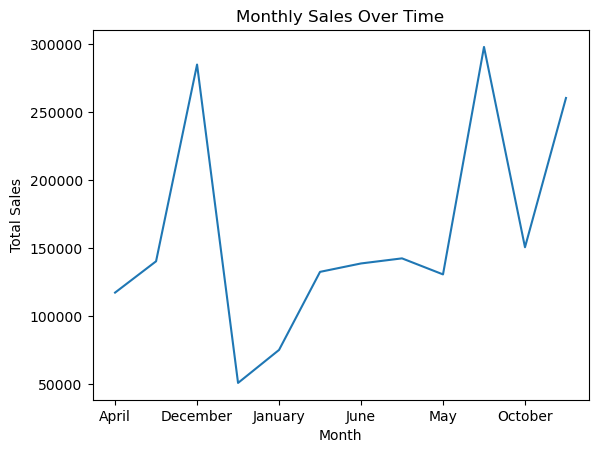

In [22]:
yearly_sales = df.groupby("Order_Month")["Sales"].sum()
yearly_sales.plot(kind="line")
plt.title("Monthly Sales Over Time")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()

* Satışların aylar ve yıllara göre beraber bakılarak değişimi

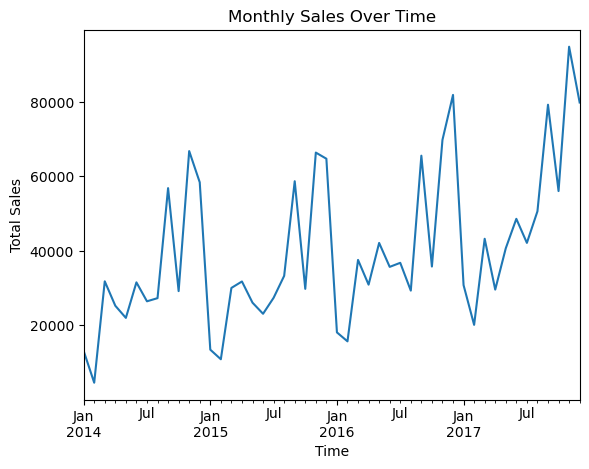

In [23]:
df['Order_YearMonth'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Order_YearMonth')['Sales'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Time')
plt.show()

* Müşteri Segmentlerinin harcadıkları para

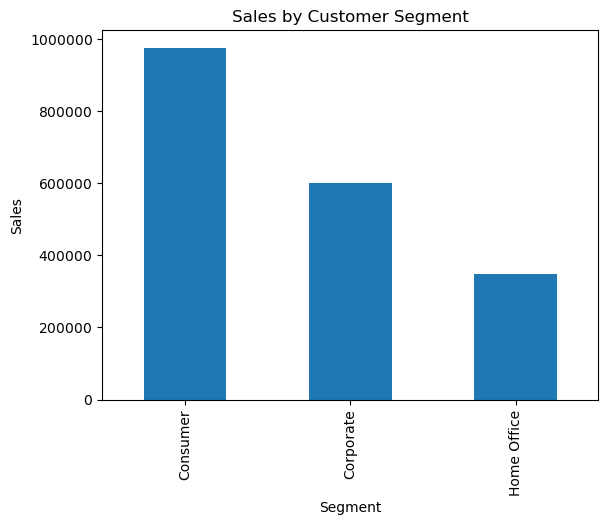

In [24]:
import matplotlib.ticker as ticker

segments_rev = df.groupby("Segment")["Sales"].sum()
segments_rev.plot(kind="bar")
plt.title("Sales by Customer Segment")
plt.ylabel("Sales")
plt.xlabel("Segment")

formatter = ticker.ScalarFormatter(useMathText=True) #y ekseninde scientific notation kapatma
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

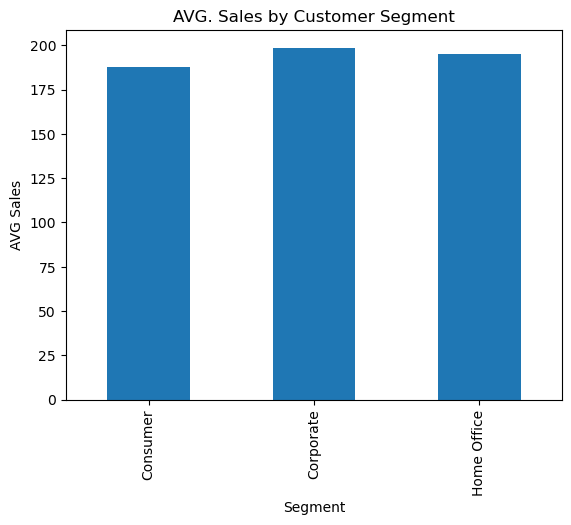

In [25]:
segments_rev_avg = df.groupby("Segment")["Sales"].mean()
segments_rev_avg.plot(kind="bar")
plt.title("AVG. Sales by Customer Segment")
plt.ylabel("AVG Sales")
plt.xlabel("Segment")
plt.show()

* Hangi ürün grubundan kaç adet satıldı

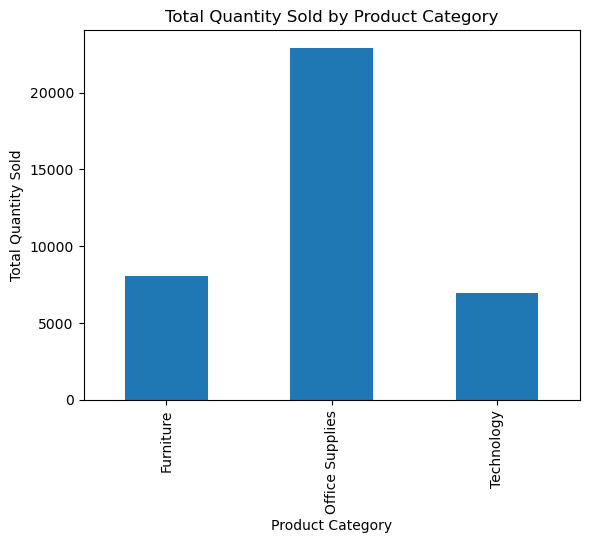

In [26]:
category_count = df.groupby("Category")["Quantity"].sum()

category_count.plot(kind="bar")
plt.title("Total Quantity Sold by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.show()

* En karlı müşteri segmentimiz.

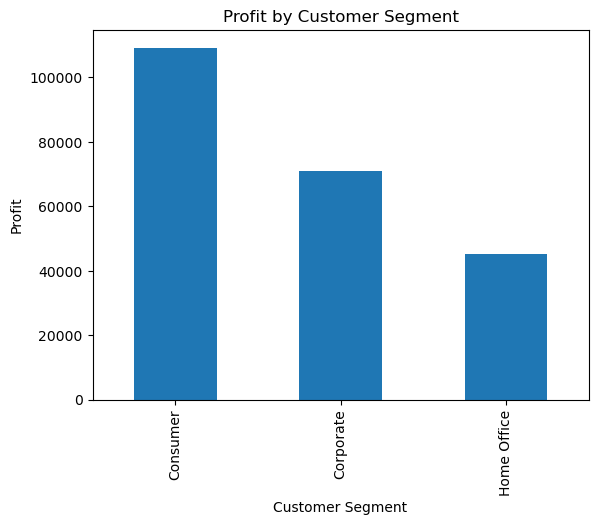

In [27]:
profit_segment = df.groupby("Segment")["Profit"].sum()

profit_segment.plot(kind="bar")
plt.title("Profit by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Profit")
plt.show()

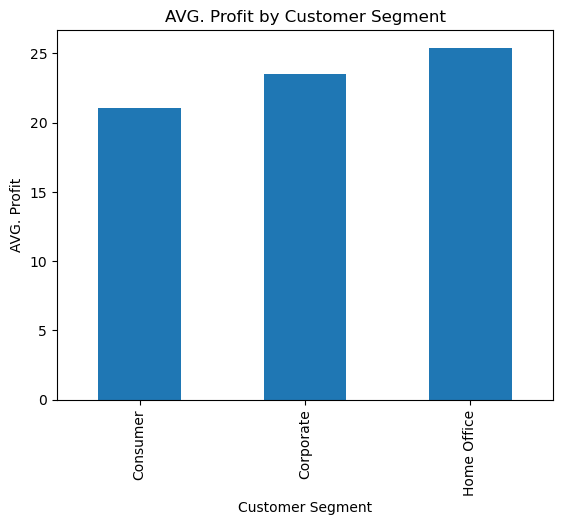

In [28]:
profit_segment_avg = df.groupby("Segment")["Profit"].mean()

profit_segment_avg.plot(kind="bar")
plt.title("AVG. Profit by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("AVG. Profit")
plt.show()

* Kara göre ürün kategorilerinin karşılaştırılması

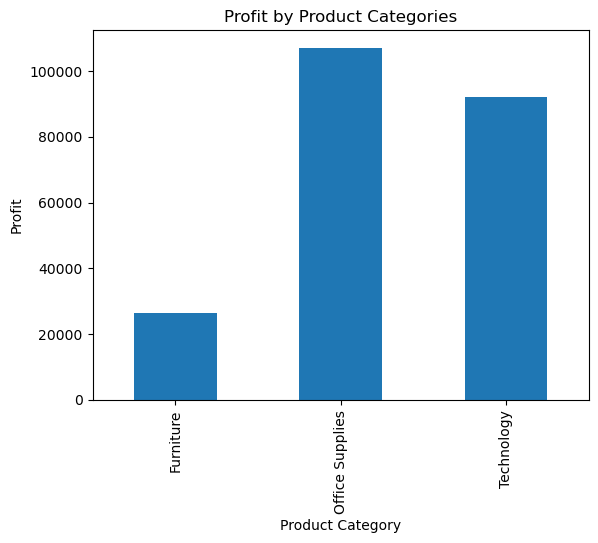

In [29]:
profit_category = df.groupby("Category")["Profit"].sum()

profit_category.plot(kind="bar")
plt.title("Profit by Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.show()

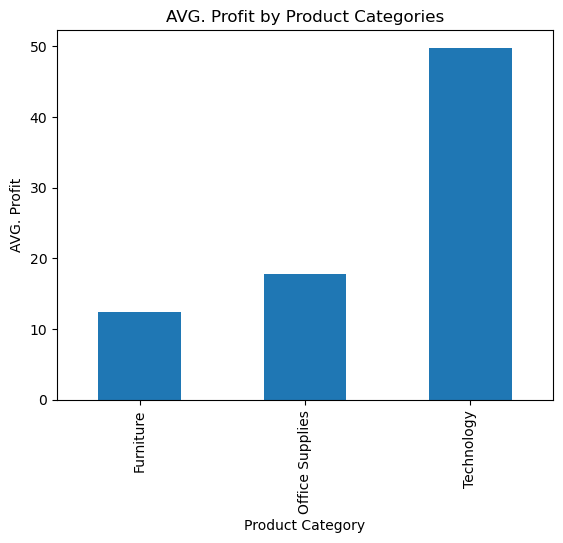

In [30]:
profit_category_avg = df.groupby("Category")["Profit"].mean()

profit_category_avg.plot(kind="bar")
plt.title("AVG. Profit by Product Categories")
plt.xlabel("Product Category")
plt.ylabel("AVG. Profit")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

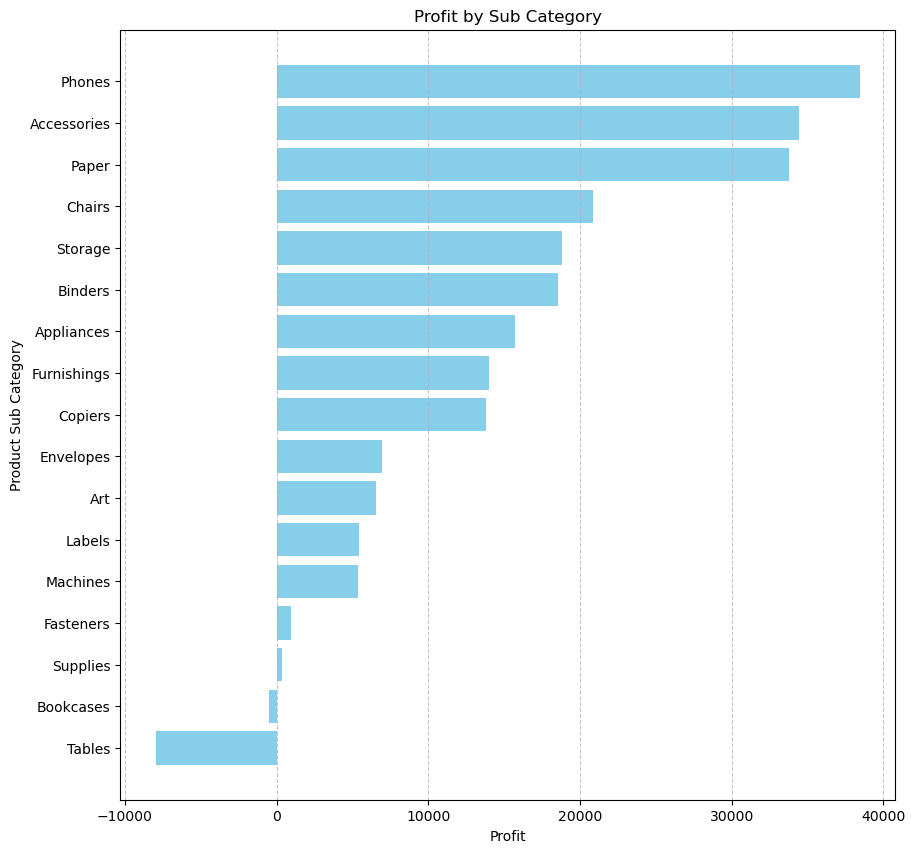

In [31]:
profit_category_sub = df.groupby("Sub_Category")["Profit"].sum().reset_index()
profit_category_sub.columns=["Sub_Category", "Profit"]
profit_category_sub_sorted=profit_category_sub.sort_values(by="Profit", ascending=True)
plt.figure(figsize=(10, 10))
plt.barh(profit_category_sub_sorted["Sub_Category"], profit_category_sub_sorted["Profit"], color="skyblue")
plt.xlabel("Profit")
plt.ylabel("Product Sub Category")
plt.title("Profit by Sub Category")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show

* Her müşteri segmentine uygulanan ortalama indirim miktarı

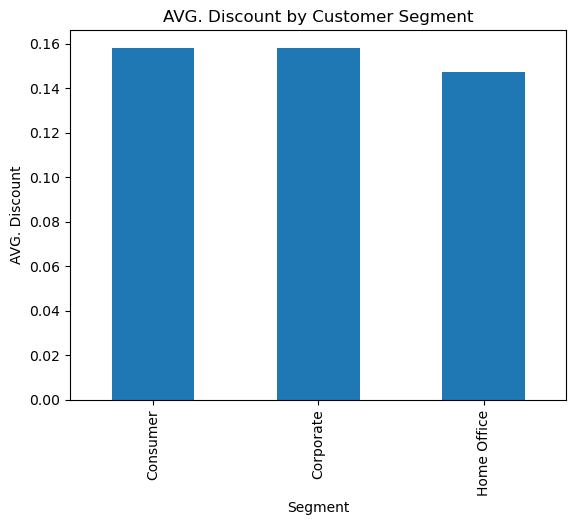

In [32]:
segment_disc = df.groupby("Segment")["Discount"].mean()

segment_disc.plot(kind="bar")
plt.title("AVG. Discount by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("AVG. Discount")
plt.show()

# Customer Features

* Müşteri davranışlarını inceleyebilmek adına müşteri ID'leri bazında tekilleştirilmiş veri setinin oluşturulması

### Customer_ID'ye göre gruplandırma

In [33]:
grouped = df.groupby('Customer_ID')

In [34]:
# Toplam harcama, sipariş sayısı, sum profit ve avg discount

customer_features = grouped.agg({
    'Sales': 'sum',
    'Order_ID': 'nunique',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()
customer_features.columns = ['Customer_ID', 'Total_Sales', 'Total_Orders', 'Total_Profit', 'Avg_Discount']

In [35]:
# Ortalama sepet büyüklüğü
customer_features['Avg_Basket_Size'] = customer_features['Total_Sales'] / customer_features['Total_Orders']

In [36]:
# En sık sipariş edilen kategori ve alt kategori
most_common_category = grouped['Category'].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_common_sub_category = grouped['Sub_Category'].agg(lambda x: x.value_counts().idxmax()).reset_index()
customer_features = customer_features.merge(most_common_category, on='Customer_ID')
customer_features = customer_features.merge(most_common_sub_category, on='Customer_ID')
customer_features.columns = ['Customer_ID', 'Total_Sales', 'Total_Orders', 'Total_Profit', 
                             'Avg_Discount', 'Avg_Basket_Size', 'Most_Common_Category', 'Most_Common_Sub_Category']

In [37]:
# En sık sipariş edilen ürün
most_common_product = grouped['Product_ID'].agg(lambda x: x.value_counts().idxmax()).reset_index()
customer_features = customer_features.merge(most_common_product, on='Customer_ID')
customer_features.columns = ['Customer_ID', 'Total_Sales', 'Total_Orders', 'Total_Profit', 'Avg_Discount', 'Avg_Basket_Size', 
                             'Most_Common_Category', 'Most_Common_Sub_Category', 'Most_Common_Product']

In [38]:
# En sık şehir/bölge ve shipmode müşteriid'e göre
most_common_ship_mode = grouped['Ship_Mode'].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_common_city = grouped['City'].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_common_state = grouped['State'].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_common_region = grouped['Region'].agg(lambda x: x.value_counts().idxmax()).reset_index()
customer_features = customer_features.merge(most_common_ship_mode, on='Customer_ID')
customer_features = customer_features.merge(most_common_city, on='Customer_ID')
customer_features = customer_features.merge(most_common_state, on='Customer_ID')
customer_features = customer_features.merge(most_common_region, on='Customer_ID')
customer_features.columns = ['Customer_ID', 'Total_Sales', 'Total_Orders', 'Total_Profit', 'Avg_Discount', 'Avg_Basket_Size', 'Most_Common_Category', 
                             'Most_Common_Sub_Category', 'Most_Common_Product', 'Most_Common_Ship_Mode', 'Most_Common_City', 'Most_Common_State', 'Most_Common_Region']

In [39]:
# Ortalama miktar
avg_quantity = grouped['Quantity'].mean().reset_index()
avg_quantity.columns = ['Customer_ID', 'Avg_Quantity']
customer_features = customer_features.merge(avg_quantity, on='Customer_ID')

In [40]:
# Recency (En son sipariş tarihi)
last_order_date = grouped['Order_Date'].max().reset_index()
last_order_date.columns = ['Customer_ID', 'Last_Order_Date']
customer_features = customer_features.merge(last_order_date, on='Customer_ID')
today = pd.to_datetime('2018-01-01')
customer_features['Recency'] = (today - customer_features['Last_Order_Date']).dt.days  # Recency hesaplaması

In [41]:
# Tenure (2018-01-01 ile ilk sipariş tarihi arasındaki fark)
first_order_date = grouped['Order_Date'].min().reset_index()
first_order_date.columns = ['Customer_ID', 'First_Order_Date']
customer_features = customer_features.merge(first_order_date, on='Customer_ID')
customer_features['Tenure'] = (today - customer_features['First_Order_Date']).dt.days  # Tenure hesaplaması

In [42]:
# Segment
segment = grouped['Segment'].first().reset_index()  # Her müşteri için ilk segment değerini alıyoruz
customer_features = customer_features.merge(segment, on='Customer_ID')

In [43]:
# Her müşteri için ortalama alışveriş periyodunu hesaplama
def calculate_avg_period(order_dates):
    order_dates = pd.to_datetime(order_dates).sort_values()
    periods = order_dates.diff().dropna()
    return periods.mean().days

avg_periods = grouped['Order_Date'].apply(calculate_avg_period).reset_index()
avg_periods.columns = ['Customer_ID', 'Avg_Period']
customer_features = customer_features.merge(avg_periods, on='Customer_ID')

* Son alışveriş tarihlerinden bugüne geçen süre alışveriş periyodunu geçmiş olan müşteriler var mı? Var ise bu müşterilerin belirlenmesi

In [44]:
# Churn hesaplama
def churn_calc(period, lastorder, today):
    if (today - lastorder).days > period:
        return 1
    else:
        return 0
    
customer_features['Churn'] = customer_features.apply(lambda row: churn_calc(row['Avg_Period'], row['Last_Order_Date'], today), axis=1)

In [45]:
# Churn dağılımını kontrol etme
print(customer_features['Churn'].value_counts())

Churn
0    465
1    328
Name: count, dtype: int64


* 328 müşteri alışveriş periyodları geldiği halde alışveriş yapmamış görünüyor. Bu müşterilerin churn olduğunu kabul edersek, elimizdeki verilerle churn olması muhtemel müşteriler tahmin edilebilir mi ?

In [46]:
customer_features.rename(columns={'Total_Orders': 'Frequency'}, inplace=True)

In [47]:
for col in customer_features.columns:
    print(col)

Customer_ID
Total_Sales
Frequency
Total_Profit
Avg_Discount
Avg_Basket_Size
Most_Common_Category
Most_Common_Sub_Category
Most_Common_Product
Most_Common_Ship_Mode
Most_Common_City
Most_Common_State
Most_Common_Region
Avg_Quantity
Last_Order_Date
Recency
First_Order_Date
Tenure
Segment
Avg_Period
Churn


In [48]:
df2 = customer_features.copy()

In [49]:
df2.isnull().sum()

Customer_ID                 0
Total_Sales                 0
Frequency                   0
Total_Profit                0
Avg_Discount                0
Avg_Basket_Size             0
Most_Common_Category        0
Most_Common_Sub_Category    0
Most_Common_Product         0
Most_Common_Ship_Mode       0
Most_Common_City            0
Most_Common_State           0
Most_Common_Region          0
Avg_Quantity                0
Last_Order_Date             0
Recency                     0
First_Order_Date            0
Tenure                      0
Segment                     0
Avg_Period                  5
Churn                       0
dtype: int64

In [50]:
df2 = df2.dropna(subset=["Avg_Period"]) #null değerler sadece 1 kere alışveriş yapıp bir daha yapmayan müşteriler / avg period fonksiyonundan sonra bu kısım null dönüyor
df2.shape

(788, 21)

### Handling outliers

In [51]:
cat_cols = [col for col in df2.columns if df2[col].dtypes == "O"]
cat_cols

['Customer_ID',
 'Most_Common_Category',
 'Most_Common_Sub_Category',
 'Most_Common_Product',
 'Most_Common_Ship_Mode',
 'Most_Common_City',
 'Most_Common_State',
 'Most_Common_Region',
 'Segment']

In [52]:
num_cols = [col for col in df2.columns if pd.api.types.is_numeric_dtype(df2[col])]
num_cols

['Total_Sales',
 'Frequency',
 'Total_Profit',
 'Avg_Discount',
 'Avg_Basket_Size',
 'Avg_Quantity',
 'Recency',
 'Tenure',
 'Avg_Period',
 'Churn']

In [53]:
##################################
# AYKIRI DEĞER ANALİZİ 
##################################

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [54]:
# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col, check_outlier(df2, col))
    if check_outlier(df2, col):
        replace_with_thresholds(df2, col)

Total_Sales False
Frequency False
Total_Profit False
Avg_Discount False
Avg_Basket_Size False
Avg_Quantity False
Recency False
Tenure False
Avg_Period True
Churn False


In [55]:
df2.head()

Customer_ID  Total_Sales  Frequency  Total_Profit  Avg_Discount  Avg_Basket_Size Most_Common_Category Most_Common_Sub_Category Most_Common_Product  \
0    AA-10315     3053.407          5       244.352         0.091          610.681      Office Supplies               Appliances     OFF-AP-10000576   
1    AA-10375     1056.390          9       277.382         0.080          117.377      Office Supplies                  Binders     OFF-ST-10001325   
2    AA-10480     1790.512          4       435.827         0.017          447.628      Office Supplies                    Paper     OFF-PA-10002365   
3    AA-10645     5086.935          6       720.287         0.064          847.823            Furniture              Furnishings     TEC-PH-10004093   
4    AB-10015      886.156          3       129.346         0.067          295.385      Office Supplies                  Storage     FUR-CH-10004477   

  Most_Common_Ship_Mode Most_Common_City Most_Common_State Most_Common_Region  Avg_Quantity Last_Order_Date  Recency First_Order_Date  Tenure   Segment  Avg_Period  \
0        Standard Class       Round Rock             Texas            Central         2.727      2017-06-29      186       2014-03-31    1372  Consumer     118.000   
1        Standard Class          Atlanta           Georgia               East         2.733      2017-12-11       21       2014-04-21    1351  Consumer      95.000   
2        Standard Class      Springfield          Missouri            Central         3.000      2017-04-15      261       2014-05-04    1338  Consumer      97.000   
3        Standard Class    San Francisco        California               East         3.556      2017-11-05       57       2014-06-22    1289  Consumer      72.000   
4           First Class          Seattle        Washington               West         2.167      2016-11-10      417       2014-02-18    1413  Consumer     199.000   

   Churn  
0      1  
1      0  
2      1  
3      0  
4      1

### New Feature Extraction - Creating RFM Segments

In [56]:
#Customer Years değişkenini oluşturma ve müşterileri yaşlarına göre gruplama
df2['Customer_Years'] = (today.year - df2['First_Order_Date'].dt.year)
df2['1-2Years'] = df2['Customer_Years'].apply(lambda x: 1 if 1 <= x <= 2 else 0)
df2['3-4Years'] = df2['Customer_Years'].apply(lambda x: 1 if 3 <= x <= 4 else 0)

In [57]:
#RFM segmentlerinin oluşturulması ve eklenmesi
#RFM skorları

df2['RecencyScore'] = pd.qcut(df2['Recency'], q=4, labels=[4, 3, 2, 1])
df2['FrequencyScore'] = pd.qcut(df2['Frequency'], q=4, labels=[1, 2, 3, 4])
df2['MonetaryScore'] = pd.qcut(df2['Total_Sales'], q=4, labels=[1, 2, 3, 4])

In [58]:
#skorları bir araya getirerek segmentin oluşturulması

df2['RFM_Segment'] = df2['RecencyScore'].astype(str) + df2['FrequencyScore'].astype(str) + df2['MonetaryScore'].astype(str)

In [59]:
# RFM skorlarına göre segmentlere ayırma
def rfm_segment(row):
    if row['RFM_Segment'] in ['111', '112', '113', '114']:
        return 'High Value'
    elif row['RFM_Segment'] in ['211', '212', '213', '214']:
        return 'Mid Value'
    elif row['RFM_Segment'] in ['311', '312', '313', '314']:
        return 'Low Value'
    else:
        return 'Lowest Value'

In [60]:
df2['RFM_Segment_Label'] = df2.apply(rfm_segment, axis=1)

In [61]:
pd.crosstab(df2['RFM_Segment_Label'], df2['Churn'])

Churn                0    1
RFM_Segment_Label          
High Value           5  125
Low Value           63    2
Lowest Value       346  174
Mid Value           46   27

## Encoding
### 1) Rare Encoding

In [62]:
dfr = df2.copy()

In [63]:
dfr['Most_Common_Sub_Category'].value_counts(1)

Most_Common_Sub_Category
Binders       0.286
Paper         0.199
Furnishings   0.112
Phones        0.091
Storage       0.067
Art           0.066
Accessories   0.053
Chairs        0.048
Appliances    0.020
Tables        0.015
Labels        0.015
Bookcases     0.009
Envelopes     0.008
Fasteners     0.004
Machines      0.004
Copiers       0.001
Supplies      0.001
Name: proportion, dtype: float64

In [64]:
#%5'in altı
rare_sub = ["Chairs", "Appliances", "Tables","Labels", "Bookcases","Envelopes", "Fasteners","Machines", "Copiers","Supplies"]
#%5in üstü
not_rare_sub = ["Binders", "Paper", "Furnishings", "Phones", "Art", "Storage", "Accessories"]

#IsRareSubCat
dfr["New_IsRareSubCat"] = dfr["Most_Common_Sub_Category"].apply(lambda x: 1 if x in rare_sub else 0)

#Not Rare Categories
for category in not_rare_sub:
    dfr[f"New_Is{category}"] = dfr["Most_Common_Sub_Category"].apply(lambda x: 1 if x == category else 0)

In [65]:
dfr["Most_Common_City"].value_counts(1)

Most_Common_City
New York City      0.121
Los Angeles        0.082
Philadelphia       0.062
San Francisco      0.056
Seattle            0.049
Houston            0.034
Columbus           0.027
Chicago            0.023
Springfield        0.016
San Diego          0.016
Dallas             0.013
Jacksonville       0.013
Newark             0.011
Richmond           0.010
Louisville         0.010
Jackson            0.009
Phoenix            0.008
Lancaster          0.008
Henderson          0.008
Columbia           0.008
Tampa              0.006
Detroit            0.006
Charlotte          0.006
Fort Worth         0.006
Austin             0.006
Rochester          0.006
Baltimore          0.006
Clinton            0.006
Little Rock        0.006
Fayetteville       0.006
Tucson             0.006
Lakewood           0.005
Denver             0.005
Aurora             0.005
Fairfield          0.005
Colorado Springs   0.005
Atlanta            0.005
Huntsville         0.005
Franklin           0.005
Wilmingt

In [66]:
not_rare_cities = ["San Francisco", "Philedelphia", "Los Angeles", "New York City"]
rare_cities = dfr[~dfr['Most_Common_City'].isin(not_rare_cities)]['Most_Common_City'].unique().tolist()

dfr["New_IsRareCity"] = dfr["Most_Common_City"].apply(lambda x: 1 if x in rare_cities else 0)

for city in not_rare_cities:
    dfr[f'New_Is{city.replace(" ", "")}'] = dfr["Most_Common_City"].apply(lambda x: 1 if x == city else 0)

In [67]:
dfr["Most_Common_State"].value_counts(1)

Most_Common_State
California             0.261
New York               0.133
Texas                  0.113
Pennsylvania           0.053
Ohio                   0.048
Washington             0.044
Illinois               0.041
Florida                0.032
North Carolina         0.027
Colorado               0.020
Arizona                0.018
Georgia                0.018
Michigan               0.016
Virginia               0.015
Maryland               0.015
Kentucky               0.014
Tennessee              0.013
Indiana                0.011
Oregon                 0.011
New Jersey             0.011
Delaware               0.010
Missouri               0.008
Arkansas               0.008
Massachusetts          0.006
Minnesota              0.006
Connecticut            0.006
Mississippi            0.005
New Mexico             0.005
Wisconsin              0.004
Utah                   0.004
Oklahoma               0.004
Iowa                   0.003
Rhode Island           0.003
Alabama                0.

In [68]:
not_rare_states = ["California", "New York", "Texas", "Pennsylvania", "Washington"]
rare_states = dfr[~dfr['Most_Common_State'].isin(not_rare_states)]['Most_Common_State'].unique().tolist()

dfr["New_IsRareState"] = dfr["Most_Common_State"].apply(lambda x: 1 if x in rare_states else 0)

for state in not_rare_states:
    dfr[f'New_Is{state.replace(" ", "")}'] = dfr["Most_Common_State"].apply(lambda x: 1 if x == state else 0)

### 2) One Hot Encoding

In [69]:
for col in dfr.columns:
    print(col)

Customer_ID
Total_Sales
Frequency
Total_Profit
Avg_Discount
Avg_Basket_Size
Most_Common_Category
Most_Common_Sub_Category
Most_Common_Product
Most_Common_Ship_Mode
Most_Common_City
Most_Common_State
Most_Common_Region
Avg_Quantity
Last_Order_Date
Recency
First_Order_Date
Tenure
Segment
Avg_Period
Churn
Customer_Years
1-2Years
3-4Years
RecencyScore
FrequencyScore
MonetaryScore
RFM_Segment
RFM_Segment_Label
New_IsRareSubCat
New_IsBinders
New_IsPaper
New_IsFurnishings
New_IsPhones
New_IsArt
New_IsStorage
New_IsAccessories
New_IsRareCity
New_IsSanFrancisco
New_IsPhiledelphia
New_IsLosAngeles
New_IsNewYorkCity
New_IsRareState
New_IsCalifornia
New_IsNewYork
New_IsTexas
New_IsPennsylvania
New_IsWashington


In [70]:
#drop rare encoded columns and datetime since we dont need them anymore
dfr.drop(columns=["Most_Common_City", "Most_Common_State", "Most_Common_Sub_Category","Most_Common_Product", "Last_Order_Date", "First_Order_Date"], axis=1, inplace=True )

In [71]:
#rfm segment skorlarının olduğu kolonların da droplanması
dfr.drop(columns=['RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Segment'], inplace=True)

In [72]:
for col in dfr.columns:
    print(col)

Customer_ID
Total_Sales
Frequency
Total_Profit
Avg_Discount
Avg_Basket_Size
Most_Common_Category
Most_Common_Ship_Mode
Most_Common_Region
Avg_Quantity
Recency
Tenure
Segment
Avg_Period
Churn
Customer_Years
1-2Years
3-4Years
RFM_Segment_Label
New_IsRareSubCat
New_IsBinders
New_IsPaper
New_IsFurnishings
New_IsPhones
New_IsArt
New_IsStorage
New_IsAccessories
New_IsRareCity
New_IsSanFrancisco
New_IsPhiledelphia
New_IsLosAngeles
New_IsNewYorkCity
New_IsRareState
New_IsCalifornia
New_IsNewYork
New_IsTexas
New_IsPennsylvania
New_IsWashington


In [73]:
#dfr içerisinde one hot encoding uygulanacak kolonlar ve uygulama

cat_cols2 = ["Most_Common_Category", "Most_Common_Ship_Mode", "Most_Common_Region", "RFM_Segment_Label", "Segment"]
dfr = pd.get_dummies(dfr, columns=cat_cols2, drop_first=True)
dfr.head()

Customer_ID  Total_Sales  Frequency  Total_Profit  Avg_Discount  Avg_Basket_Size  Avg_Quantity  Recency  Tenure  Avg_Period  Churn  Customer_Years  1-2Years  \
0    AA-10315     3053.407          5       244.352         0.091          610.681         2.727      186    1372     118.000      1               4         0   
1    AA-10375     1056.390          9       277.382         0.080          117.377         2.733       21    1351      95.000      0               4         0   
2    AA-10480     1790.512          4       435.827         0.017          447.628         3.000      261    1338      97.000      1               4         0   
3    AA-10645     5086.935          6       720.287         0.064          847.823         3.556       57    1289      72.000      0               4         0   
4    AB-10015      886.156          3       129.346         0.067          295.385         2.167      417    1413     199.000      1               4         0   

   3-4Years  New_IsRareSubCat  New_IsBinders  New_IsPaper  New_IsFurnishings  New_IsPhones  New_IsArt  New_IsStorage  New_IsAccessories  New_IsRareCity  \
0         1                 1              0            0                  0             0          0              0                  0               1   
1         1                 0              1            0                  0             0          0              0                  0               1   
2         1                 0              0            1                  0             0          0              0                  0               1   
3         1                 0              0            0                  1             0          0              0                  0               0   
4         1                 0              0            0                  0             0          0              1                  0               1   

   New_IsSanFrancisco  New_IsPhiledelphia  New_IsLosAngeles  New_IsNewYorkCity  New_IsRareState  New_IsCalifornia  New_IsNewYork  New_IsTexas  New_IsPennsylvania  \
0                   0                   0                 0                  0                0                 0              0            1                   0   
1                   0                   0                 0                  0                1                 0              0            0                   0   
2                   0                   0                 0                  0                1                 0              0            0                   0   
3                   1                   0                 0                  0                0                 1              0            0                   0   
4                   0                   0                 0                  0                0                 0              0            0                   0   

   New_IsWashington  Most_Common_Category_Office Supplies  Most_Common_Category_Technology  Most_Common_Ship_Mode_Same Day  Most_Common_Ship_Mode_Second Class  \
0                 0                                  True                            False                           False                               False   
1                 0                                  True                            False                           False                               False   
2                 0                                  True                            False                           False                               False   
3                 0                                 False                            False                           False                               False   
4                 1                                  True                            False                           False                               False   

   Most_Common_Ship_Mode_Standard Class  Most_Common_Region_East  Most_Common_Region_South  Most_Common_Region_West  RFM_Segment_Label

In [74]:
#one hot encoding sonrası bool olarak gelen kolonların integer'a çevrilmesi

bool_cols = [col for col in dfr.columns if dfr[col].dtypes == "bool"]
dfr[bool_cols] = dfr[bool_cols].astype(int)
dfr.dtypes

Customer_ID                              object
Total_Sales                             float64
Frequency                                 int64
Total_Profit                            float64
Avg_Discount                            float64
Avg_Basket_Size                         float64
Avg_Quantity                            float64
Recency                                   int64
Tenure                                    int64
Avg_Period                              float64
Churn                                     int64
Customer_Years                            int32
1-2Years                                  int64
3-4Years                                  int64
New_IsRareSubCat                          int64
New_IsBinders                             int64
New_IsPaper                               int64
New_IsFurnishings                         int64
New_IsPhones                              int64
New_IsArt                                 int64
New_IsStorage                           

In [75]:
dfs = dfr.copy()

In [76]:
dfr.index = dfr["Customer_ID"]

In [77]:
dfr.drop("Customer_ID", axis=1, inplace=True)

In [78]:
#Churn tanımı recency üzerinden yapıldığı için modelin ezberlememesi
#ve yanlı sonuç çıkarmaması adına Recency kolonu kaldırılması


dfr.drop("Recency", axis=1, inplace=True)

for col in dfr.columns:
    print(col)

Total_Sales
Frequency
Total_Profit
Avg_Discount
Avg_Basket_Size
Avg_Quantity
Tenure
Avg_Period
Churn
Customer_Years
1-2Years
3-4Years
New_IsRareSubCat
New_IsBinders
New_IsPaper
New_IsFurnishings
New_IsPhones
New_IsArt
New_IsStorage
New_IsAccessories
New_IsRareCity
New_IsSanFrancisco
New_IsPhiledelphia
New_IsLosAngeles
New_IsNewYorkCity
New_IsRareState
New_IsCalifornia
New_IsNewYork
New_IsTexas
New_IsPennsylvania
New_IsWashington
Most_Common_Category_Office Supplies
Most_Common_Category_Technology
Most_Common_Ship_Mode_Same Day
Most_Common_Ship_Mode_Second Class
Most_Common_Ship_Mode_Standard Class
Most_Common_Region_East
Most_Common_Region_South
Most_Common_Region_West
RFM_Segment_Label_Low Value
RFM_Segment_Label_Lowest Value
RFM_Segment_Label_Mid Value
Segment_Corporate
Segment_Home Office


## Scaling
### Robust Scaling

In [79]:
from sklearn.preprocessing import RobustScaler

In [80]:
scaler = RobustScaler()
dfr[dfr.columns] = scaler.fit_transform(dfr)

In [81]:
dfr.head()

Total_Sales  Frequency  Total_Profit  Avg_Discount  Avg_Basket_Size  Avg_Quantity  Tenure  Avg_Period  Churn  Customer_Years  1-2Years  3-4Years  \
Customer_ID                                                                                                                                                     
AA-10315           0.408     -0.333         0.012        -0.490            0.882        -1.159   0.697       0.387  1.000           0.000     0.000     0.000   
AA-10375          -0.551      1.000         0.097        -0.580           -0.791        -1.152   0.607       0.045  0.000           0.000     0.000     0.000   
AA-10480          -0.198     -0.667         0.503        -1.106            0.329        -0.852   0.552       0.074  1.000           0.000     0.000     0.000   
AA-10645           1.384      0.000         1.232        -0.714            1.686        -0.227   0.341      -0.297  0.000           0.000     0.000     0.000   
AB-10015          -0.632     -1.000        -0.282        -0.691           -0.187        -1.790   0.873       1.591  1.000           0.000     0.000     0.000   

             New_IsRareSubCat  New_IsBinders  New_IsPaper  New_IsFurnishings  New_IsPhones  New_IsArt  New_IsStorage  New_IsAccessories  New_IsRareCity  \
Customer_ID                                                                                                                                               
AA-10315                1.000          0.000        0.000              0.000         0.000      0.000          0.000              0.000           0.000   
AA-10375                0.000          1.000        0.000              0.000         0.000      0.000          0.000              0.000           0.000   
AA-10480                0.000          0.000        1.000              0.000         0.000      0.000          0.000              0.000           0.000   
AA-10645                0.000          0.000        0.000              1.000         0.000      0.000          0.000              0.000          -1.000   
AB-10015                0.000          0.000        0.000              0.000         0.000      0.000          1.000              0.000           0.000   

             New_IsSanFrancisco  New_IsPhiledelphia  New_IsLosAngeles  New_IsNewYorkCity  New_IsRareState  New_IsCalifornia  New_IsNewYork  New_IsTexas  \
Customer_ID                                                                                                                                               
AA-10315                  0.000               0.000             0.000              0.000            0.000             0.000          0.000        1.000   
AA-10375                  0.000               0.000             0.000              0.000            1.000             0.000          0.000        0.000   
AA-10480                  0.000               0.000             0.000              0.000            1.000             0.000          0.000        0.000   
AA-10645                  1.000               0.000             0.000              0.000            0.000             1.000          0.000        0.000   
AB-10015                  0.000               0.000             0.000              0.000            0.000             0.000          0.000        0.000   

             New_IsPennsylvania  New_IsWashington  Most_Common_Category_Office Supplies  Most_Common_Category_Technology  Most_Common_Ship_Mode_Same Day  \
Customer_ID                                                                                                                                                
AA-10315                  0.000             0.000                                 0.000                            0.000                           0.000   
AA-10375                  0.000             0.000                                 0.000                            0.000                           0.000   
AA-10480                  0.000             0.000                                 0.000  

In [82]:
csv_add = "superstore_ml2.csv"
dfr.to_csv(csv_add, index=False)

# Modeling

In [83]:
y = dfr["Churn"]
X = dfr.drop(["Churn"], axis=1) #,"customerID"

In [84]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=17)

In [85]:
dfr.shape

(788, 44)

In [86]:
X_train.shape

(630, 43)

In [87]:
X_test.shape

(158, 43)

### 1) Catboost

In [88]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)

In [89]:
y_pred = catboost_model.predict(X_test)

In [90]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.85
Recall: 0.88
Precision: 0.71
F1: 0.79
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88       108
         1.0       0.71      0.88      0.79        50

    accuracy                           0.85       158
   macro avg       0.82      0.86      0.83       158
weighted avg       0.87      0.85      0.85       158



In [91]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

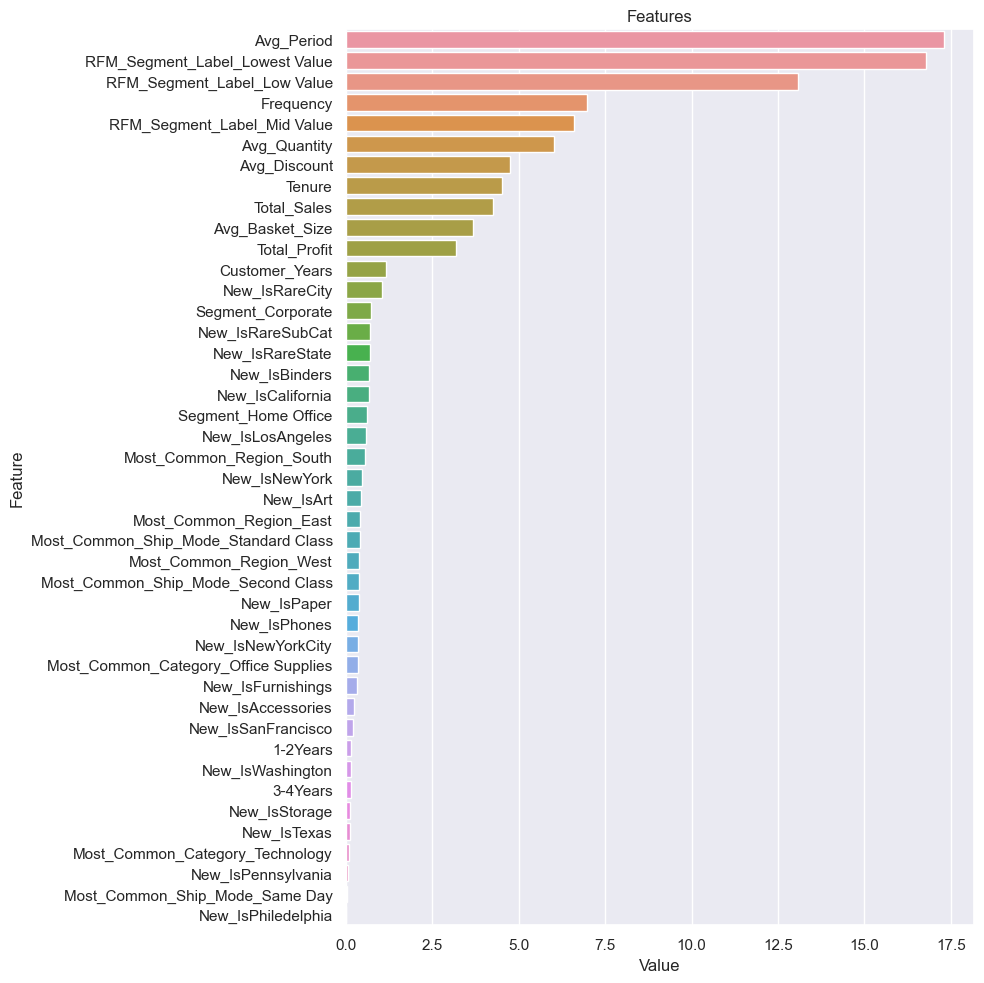

In [92]:
plot_importance(catboost_model, X)

### 2) XGBM

In [93]:
xgb_model = XGBClassifier(use_label_encoder=False, random_state=12345, eval_metric='logloss').fit(X_train, y_train)

In [94]:
y_pred = xgb_model.predict(X_test)

In [95]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.85
Recall: 0.82
Precision: 0.81
F1: 0.81
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        97
           1       0.81      0.82      0.81        61

    accuracy                           0.85       158
   macro avg       0.85      0.85      0.85       158
weighted avg       0.85      0.85      0.85       158



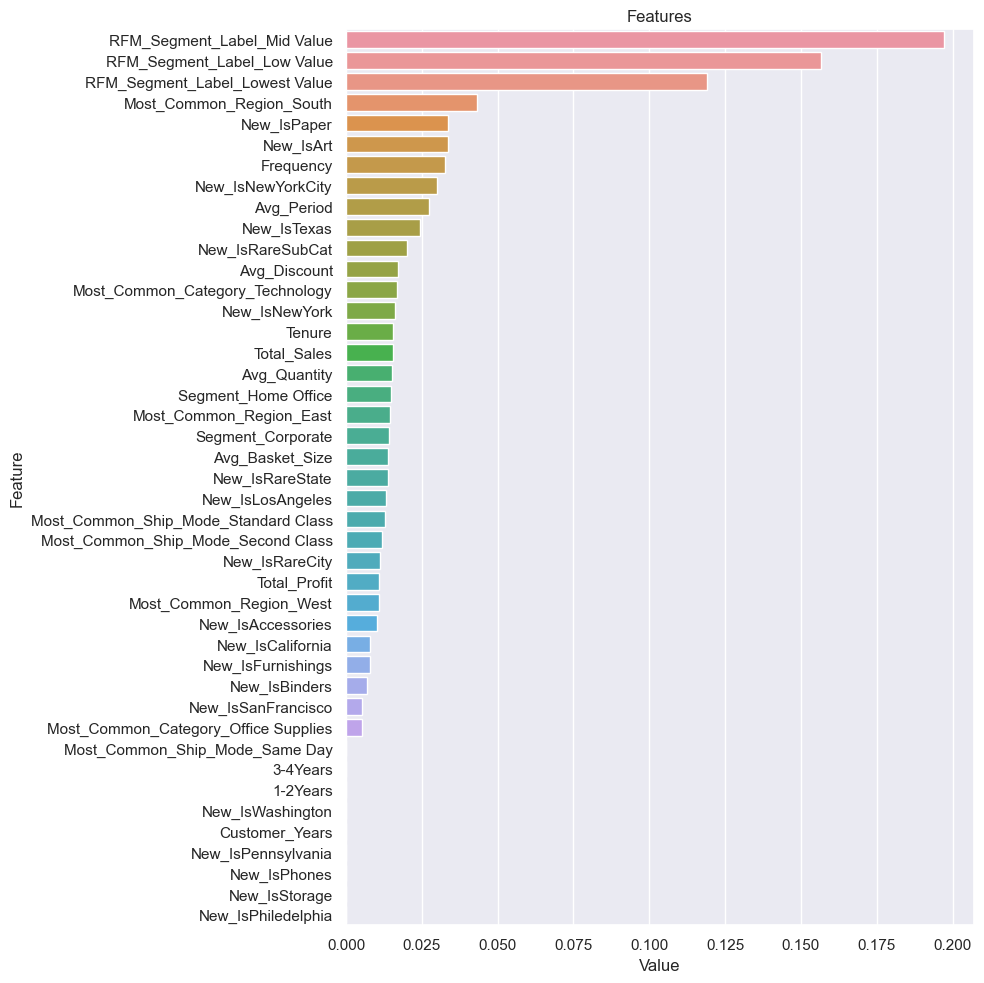

In [96]:
plot_importance(xgb_model, X)

### 3) LGBM

In [97]:
lgb_model = LGBMClassifier(random_state=12345).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 266, number of negative: 364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1390
[LightGBM] [Info] Number of data points in the train set: 630, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.422222 -> initscore=-0.313658
[LightGBM] [Info] Start training from score -0.313658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [98]:
y_pred = lgb_model.predict(X_test)

In [99]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.86
Recall: 0.84
Precision: 0.79
F1: 0.82
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       100
         1.0       0.79      0.84      0.82        58

    accuracy                           0.86       158
   macro avg       0.85      0.86      0.85       158
weighted avg       0.86      0.86      0.86       158



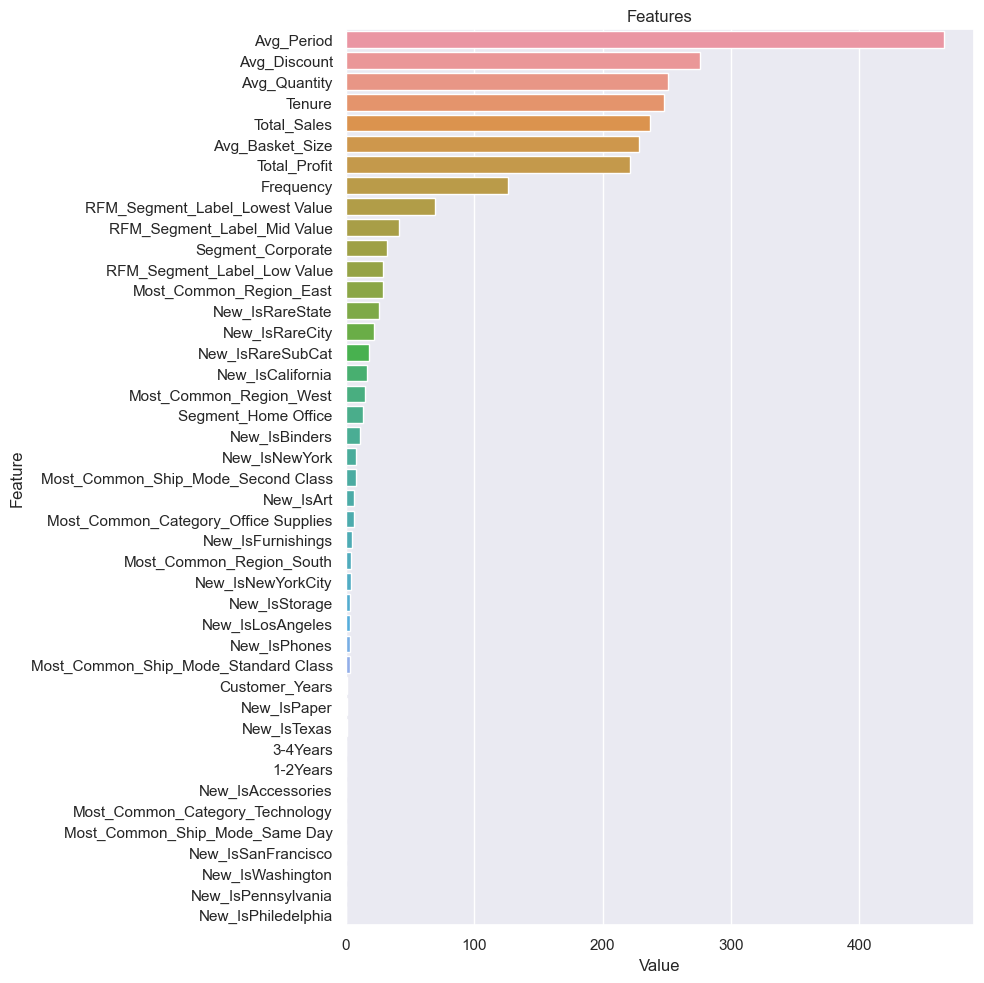

In [100]:
plot_importance(lgb_model, X)

### 4) Random Forest

In [101]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=12345).fit(X_train, y_train)

In [102]:
y_pred = rf_model.predict(X_test)

In [103]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.8
Recall: 0.82
Precision: 0.65
F1: 0.72
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       109
         1.0       0.65      0.82      0.72        49

    accuracy                           0.80       158
   macro avg       0.78      0.81      0.78       158
weighted avg       0.83      0.80      0.81       158



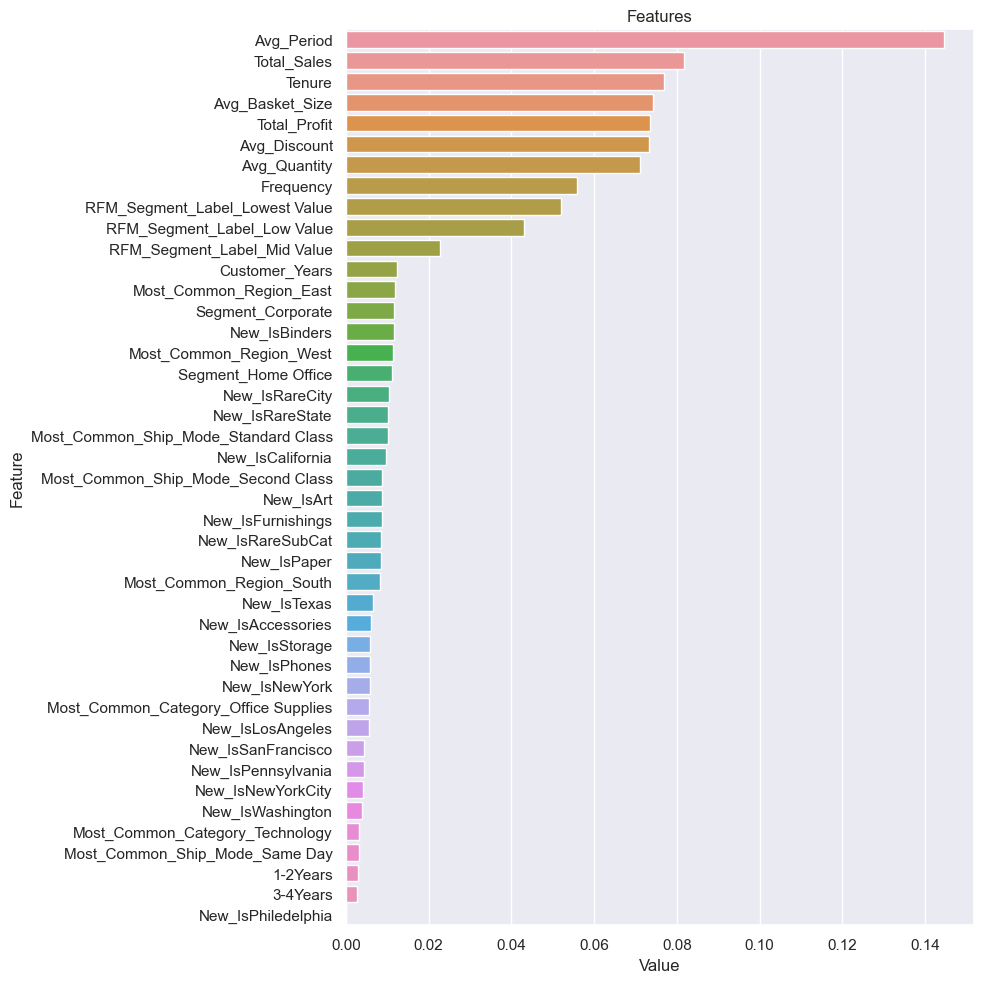

In [104]:
plot_importance(rf_model, X)

### 5) Logistic Regression

In [105]:
logreg_model = LogisticRegression(random_state=12345).fit(X_train, y_train)

In [106]:
y_pred = logreg_model.predict(X_test)

In [107]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.85
Recall: 0.98
Precision: 0.65
F1: 0.78
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89       117
         1.0       0.65      0.98      0.78        41

    accuracy                           0.85       158
   macro avg       0.82      0.89      0.83       158
weighted avg       0.90      0.85      0.86       158



### Randomforest feature importance grafiğine göre ilk 16 değişkene göre farklı modellerin uygulanması

In [108]:
selected_cols = ['Avg_Period', 'Avg_Basket_Size', 'Avg_Discount', 'Total_Sales', 
                 'Avg_Quantity', 'Tenure', 'Total_Profit', 'Frequency', 
                    'RFM_Segment_Label_Lowest Value', 'RFM_Segment_Label_Low Value', 
                 'RFM_Segment_Label_Mid Value', 'Most_Common_Region_West', 'Most_Common_Region_East', 
                 'Customer_Years', 'New_IsBinders', 
                    'Segment_Corporate', 'Churn']

In [109]:
dfm = dfr[selected_cols]
dfm

Avg_Period  Avg_Basket_Size  Avg_Discount  Total_Sales  Avg_Quantity  Tenure  Total_Profit  Frequency  RFM_Segment_Label_Lowest Value  \
Customer_ID                                                                                                                                          
AA-10315          0.387            0.882        -0.490        0.408        -1.159   0.697         0.012     -0.333                          -1.000   
AA-10375          0.045           -0.791        -0.580       -0.551        -1.152   0.607         0.097      1.000                           0.000   
AA-10480          0.074            0.329        -1.106       -0.198        -0.852   0.552         0.503     -0.667                          -1.000   
AA-10645         -0.297            1.686        -0.714        1.384        -0.227   0.341         1.232      0.000                           0.000   
AB-10015          1.591           -0.187        -0.691       -0.632        -1.790   0.873        -0.282     -1.000                          -1.000   
AB-10060         -0.699            0.593        -0.875        0.960        -0.727  -1.603         1.347      0.667                           0.000   
AB-10105         -0.535            0.846         0.746        1.822        -0.121  -0.436         0.735      1.333                           0.000   
AB-10150          0.461           -0.533        -0.138       -0.594        -0.758   0.809         0.190     -0.333                          -1.000   
AB-10165         -0.104           -0.716        -0.118       -0.523        -0.370  -0.290        -0.048      0.667                           0.000   
AB-10255         -0.134           -0.844        -0.415       -0.619        -1.093   0.212         0.064      1.000                           0.000   
AB-10600          0.937            0.096         1.866       -0.330         1.117  -0.298        -1.318     -0.667                          -1.000   
AC-10420          2.468           -0.142         1.410       -0.613        -0.402   0.255        -0.773     -1.000                          -1.000   
AC-10450          0.758            1.189         0.322        1.298         1.148  -0.221         1.012      0.333                           0.000   
AC-10615         -0.654            0.532        -0.322        0.160        -0.540  -1.590         0.152     -0.333                           0.000   
AC-10660          1.279           -0.743         0.276       -0.742        -1.227  -0.152        -0.687     -0.333                          -1.000   
AD-10180          0.119            0.730        -0.760        1.115        -0.477  -0.303         1.261      0.667                           0.000   
AF-10870         -0.669           -0.194         0.415       -0.072        -0.641  -1.942         0.201      0.333                           0.000   
AF-10885          0.892           -0.458         0.888       -0.644         1.719   0.526        -0.918     -0.667                          -1.000   
AG-10270         -0.178            0.563        -1.125        0.182         0.434   0.513         0.902     -0.333                          -1.000   
AG-10300          3.182           -0.877        -0.580       -0.881        -0.627   0.586        -0.462     -0.667                          -1.000   
AG-10330         -0.431           -0.740         0.691       -0.740         1.648  -2.976        -0.627     -0.333                           0.000   
AG-10390          1.249           -1.052         0.622       -0.961         0.414   0.616        -0.436     -0.333                          -1.000   
AG-10495         -0.625           -0.190         0.454        0.073         0.755  -0.500         0.144      0.667                           0.000   
AG-10525         -0.639            0.045         0.046       -0.359        -0.102   0.135        -1.005     -0.667                          -1.000   
AG-10675         -0.446            0.028         0.094        0.148        -0.177  -1.028        -0.874      0.33

In [110]:
X = dfm.drop('Churn', axis=1)
y = dfm['Churn']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [112]:
X_test.shape

(158, 16)

### 2.1) catboost model

In [113]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

In [114]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.82
Recall: 0.8
Precision: 0.73
F1: 0.76
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       102
         1.0       0.73      0.80      0.76        56

    accuracy                           0.82       158
   macro avg       0.81      0.82      0.81       158
weighted avg       0.83      0.82      0.82       158



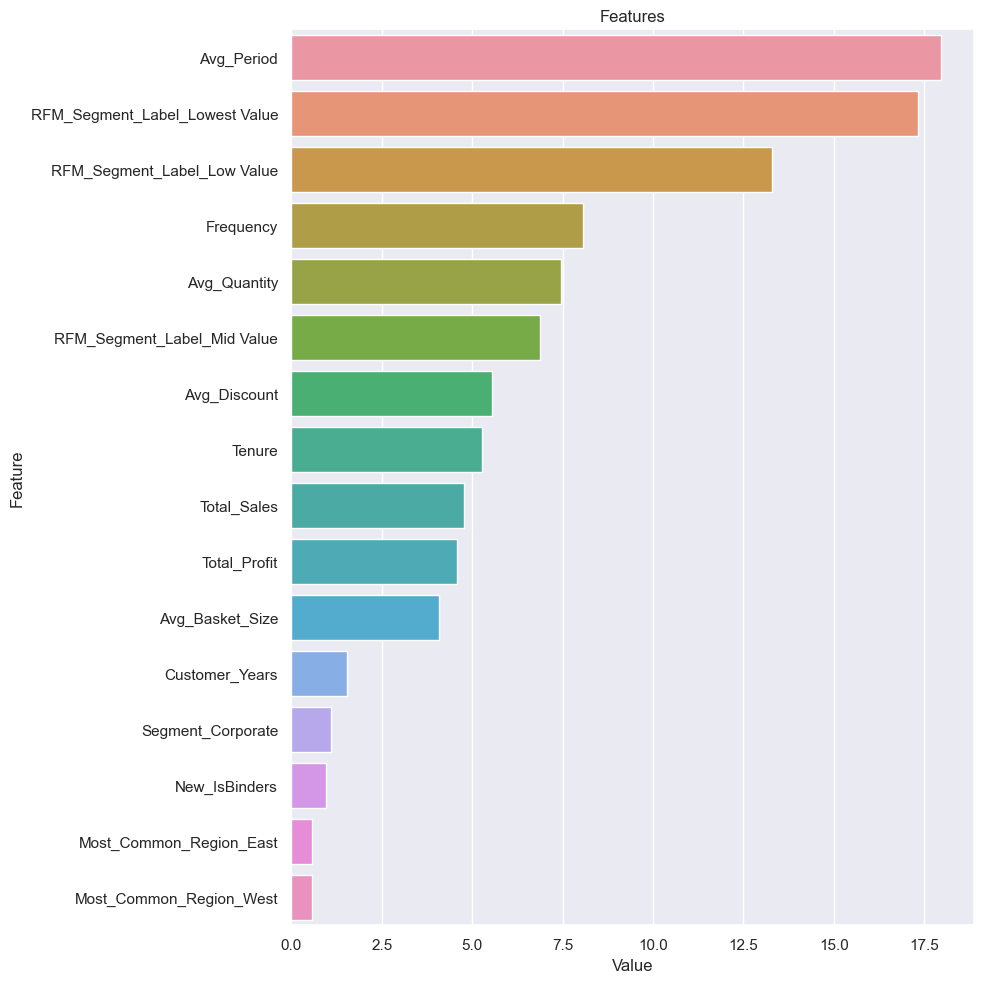

In [115]:
plot_importance(catboost_model, X)

### 2.2) xgbm model

In [116]:
xgb_model = XGBClassifier(use_label_encoder=False, random_state=12345, eval_metric='logloss').fit(X_train, y_train)

In [117]:
y_pred = xgb_model.predict(X_test)

In [118]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.84
Recall: 0.78
Precision: 0.84
F1: 0.81
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        91
           1       0.84      0.78      0.81        67

    accuracy                           0.84       158
   macro avg       0.84      0.83      0.84       158
weighted avg       0.84      0.84      0.84       158



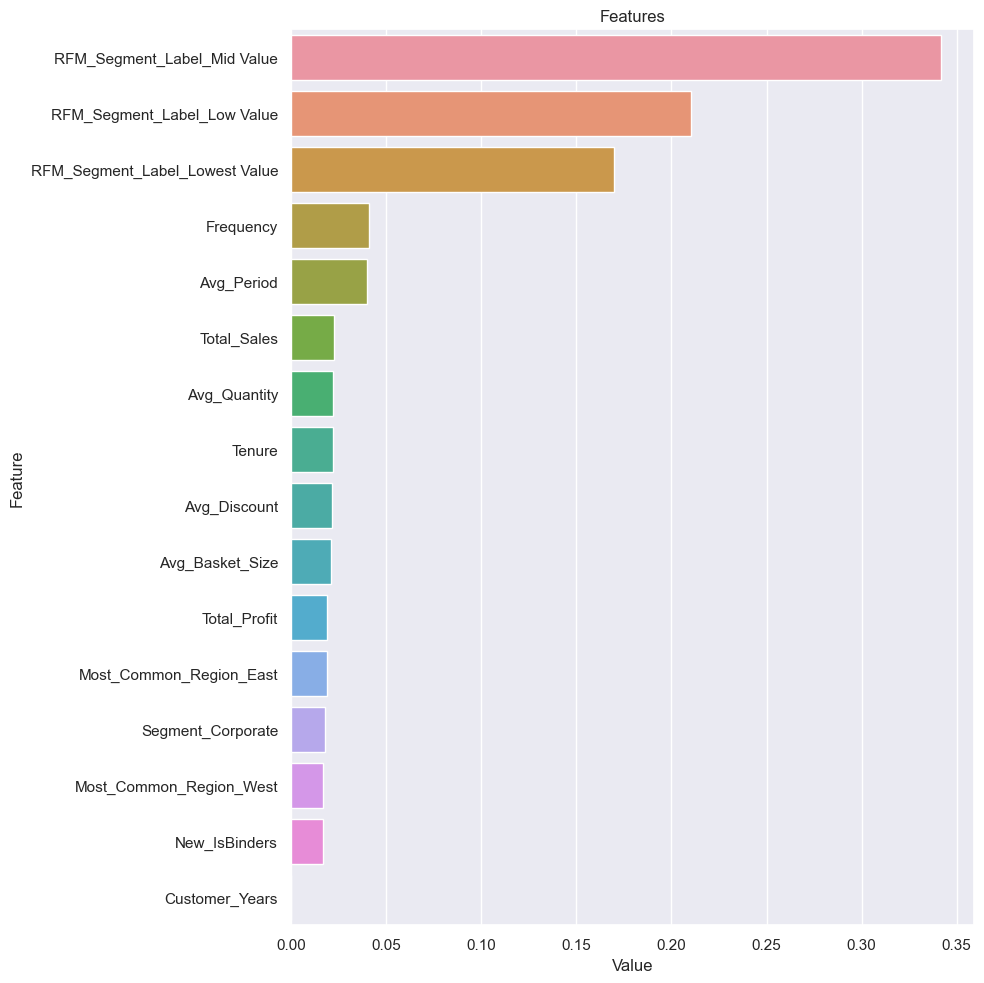

In [119]:
plot_importance(xgb_model, X)

### 2.3) LGBM

In [120]:
lgb_model = LGBMClassifier(random_state=12345).fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 266, number of negative: 364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 630, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.422222 -> initscore=-0.313658
[LightGBM] [Info] Start training from score -0.313658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [121]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.84
Recall: 0.85
Precision: 0.71
F1: 0.77
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       106
         1.0       0.71      0.85      0.77        52

    accuracy                           0.84       158
   macro avg       0.81      0.84      0.82       158
weighted avg       0.85      0.84      0.84       158



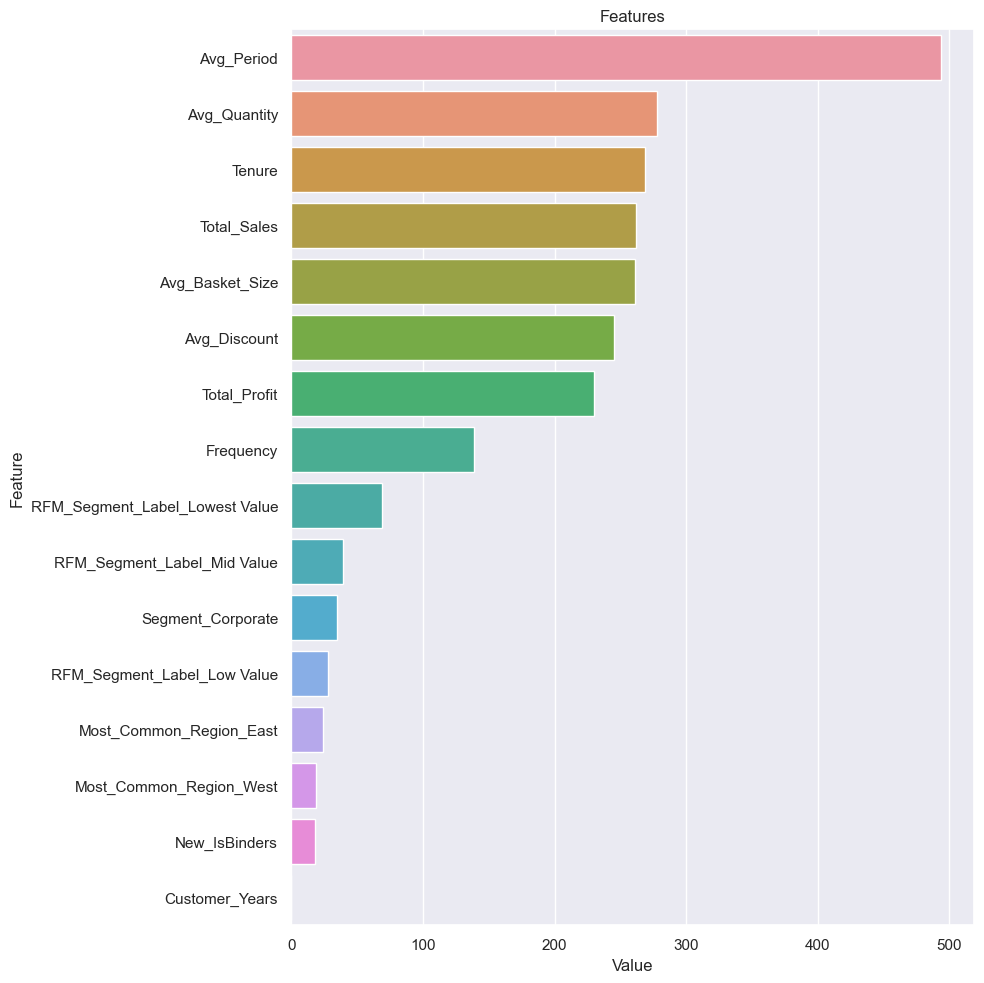

In [122]:
plot_importance(lgb_model, X)

### 2.4) Randomforest

In [123]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=12345).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [124]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.82
Recall: 0.82
Precision: 0.68
F1: 0.74
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86       107
         1.0       0.68      0.82      0.74        51

    accuracy                           0.82       158
   macro avg       0.79      0.82      0.80       158
weighted avg       0.83      0.82      0.82       158



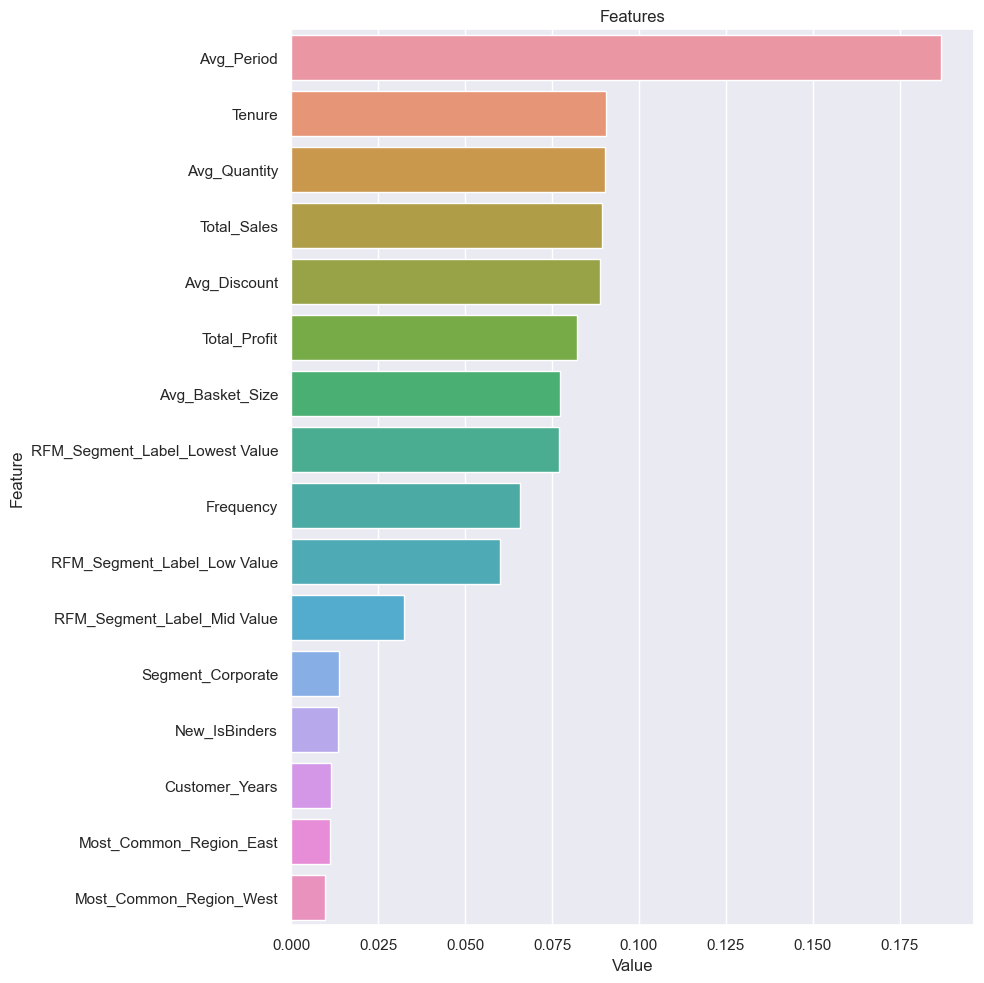

In [125]:
plot_importance(rf_model, X)

### 2.5) LogisticRegression

In [126]:
logreg_model = LogisticRegression(random_state=12345).fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

In [127]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.85
Recall: 0.98
Precision: 0.65
F1: 0.78
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89       117
         1.0       0.65      0.98      0.78        41

    accuracy                           0.85       158
   macro avg       0.82      0.89      0.83       158
weighted avg       0.90      0.85      0.86       158



# Improving Model Performance
## HPO 
### 3.1) Catboost

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345)

In [130]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'iterations': [100, 200, 300]
}

In [131]:
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='recall', cv=3, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   0.0s
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   0.0s
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   0.0s
[CV] END ........depth=4, iterations=100, learning_rate=0.05; total time=   0.0s
[CV] END ........depth=4, iterations=100, learning_rate=0.05; total time=   0.0s
[CV] END ........depth=4, iterations=100, learning_rate=0.05; total time=   0.0s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   0.0s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   0.0s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   0.0s
[CV] END ........depth=4, iterations=200, learning_rate=0.01; total time=   0.2s
[CV] END ........depth=4, iterations=200, learning_rate=0.01; total time=   0.2s
[CV] END ........depth=4, iterations=200, learn

[CV] END .......depth=10, iterations=300, learning_rate=0.01; total time=   6.5s
[CV] END .......depth=10, iterations=300, learning_rate=0.05; total time=   6.2s
[CV] END .......depth=10, iterations=300, learning_rate=0.05; total time=   6.7s
[CV] END .......depth=10, iterations=300, learning_rate=0.05; total time=   6.5s
[CV] END ........depth=10, iterations=300, learning_rate=0.1; total time=   6.1s
[CV] END ........depth=10, iterations=300, learning_rate=0.1; total time=   6.7s
[CV] END ........depth=10, iterations=300, learning_rate=0.1; total time=   6.5s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001DCB4515790>,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='recall', verbose=2)

In [132]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi recall skoru:", grid_search.best_score_)

En iyi parametreler: {'depth': 8, 'iterations': 200, 'learning_rate': 0.05}
En iyi recall skoru: 0.661644535240041


In [133]:
best_model = grid_search.best_estimator_

In [134]:
y_pred = best_model.predict(X_test)

In [135]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {round(accuracy, 2)}")
print(f"Recall: {round(recall, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"F1: {round(f1, 2)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.84
Recall: 0.74
Precision: 0.82
F1: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        96
         1.0       0.82      0.74      0.78        62

    accuracy                           0.84       158
   macro avg       0.83      0.82      0.82       158
weighted avg       0.83      0.84      0.83       158



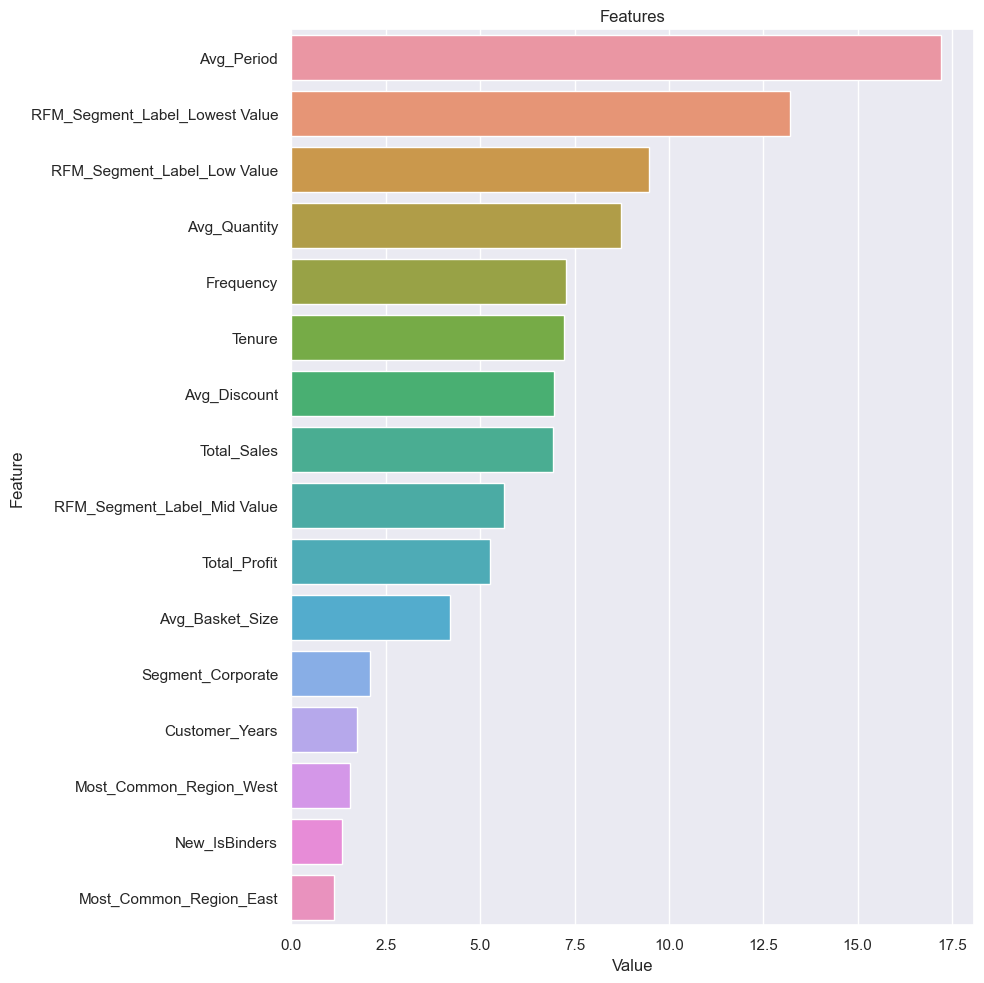

In [136]:
plot_importance(best_model, X)

### 3.2) LGBM

In [137]:
lgb_model = LGBMClassifier(random_state=12345)

In [138]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

In [139]:
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='recall', cv=3, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 177, number of negative: 243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 420, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.421429 -> initscore=-0.316912
[LightGBM] [Info] Start training from score -0.316912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 178, number of negative: 242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 420, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.423810 -> initscore=-0.307154
[LightGBM] [Info] Start training from score -0.307154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=300; total time=   0.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 177, number of negative: 243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 420, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.421429 -> initscore=-0.316912
[LightGBM] [Info] Start training from score -0.316912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 177, number of negative: 243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 420, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.421429 -> initscore=-0.316912
[LightGBM] [Info] Start training from score -0.316912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=300; total time=   0.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 177, number of negative: 243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 420, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.421429 -> initscore=-0.316912
[LightGBM] [Info] Start training from score -0.316912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 177, number of negative: 243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 420, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.421429 -> initscore=-0.316912
[LightGBM] [Info] Start training from score -0.316912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=12345),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=2)

In [140]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi recall skoru:", grid_search.best_score_)

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
En iyi recall skoru: 0.6916496424923392


In [141]:
best_model_l = grid_search.best_estimator_

In [142]:
y_pred = best_model_l.predict(X_test)

In [143]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy, 2)}")
print(f"Recall: {round(recall, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"F1: {round(f1, 2)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.83
Recall: 0.76
Precision: 0.8
F1: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86        96
         1.0       0.80      0.76      0.78        62

    accuracy                           0.83       158
   macro avg       0.82      0.82      0.82       158
weighted avg       0.83      0.83      0.83       158



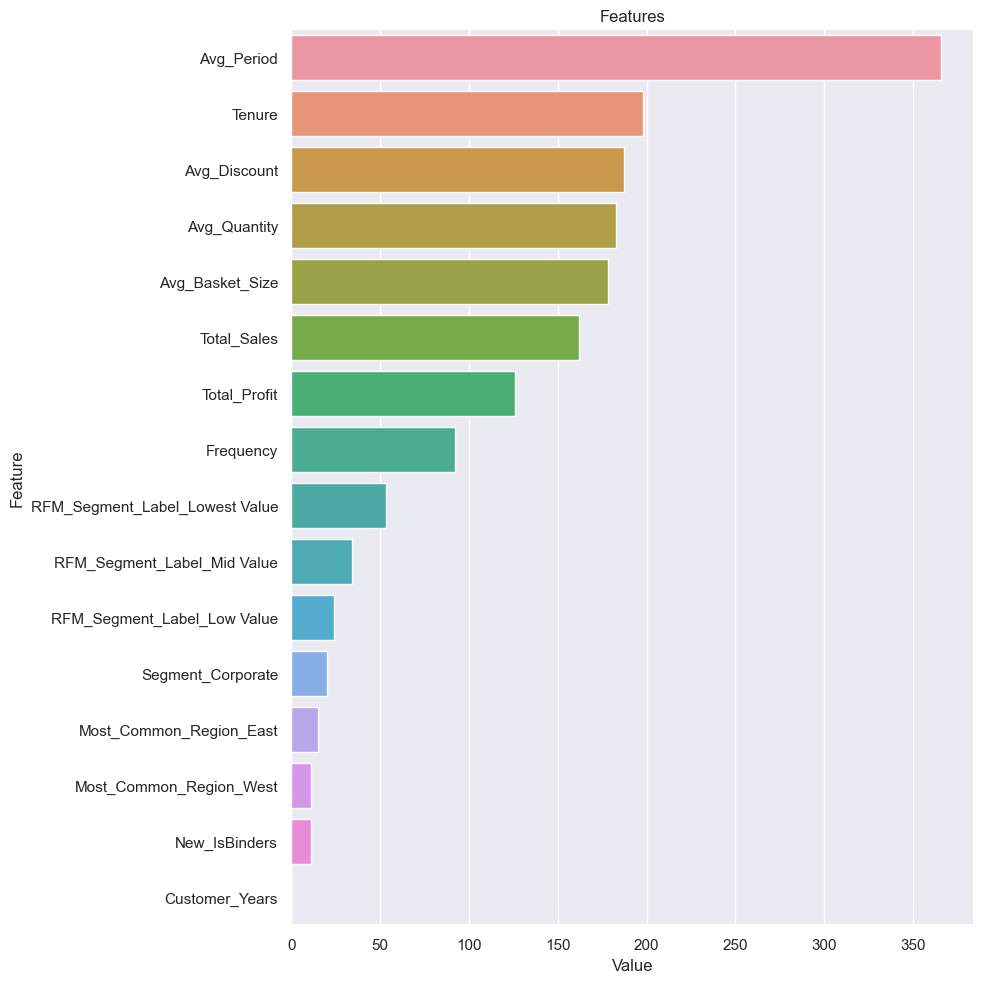

In [144]:
plot_importance(best_model_l, X)

### 3.3) Randomforest

In [145]:
rf_model = RandomForestClassifier(random_state=12345)

In [146]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [147]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='recall', cv=3, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, 

[CV] END max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_split=10, n_estimators=300; total time=   0.4s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=2)

In [148]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi recall skoru:", grid_search.best_score_)

En iyi parametreler: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
En iyi recall skoru: 0.6240211099761662


In [149]:
best_model_rf = grid_search.best_estimator_

In [150]:
y_pred = best_model_rf.predict(X_test)

In [151]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy, 2)}")
print(f"Recall: {round(recall, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"F1: {round(f1, 2)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Recall: 0.68
Precision: 0.82
F1: 0.74
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86        96
         1.0       0.82      0.68      0.74        62

    accuracy                           0.82       158
   macro avg       0.82      0.79      0.80       158
weighted avg       0.82      0.82      0.81       158



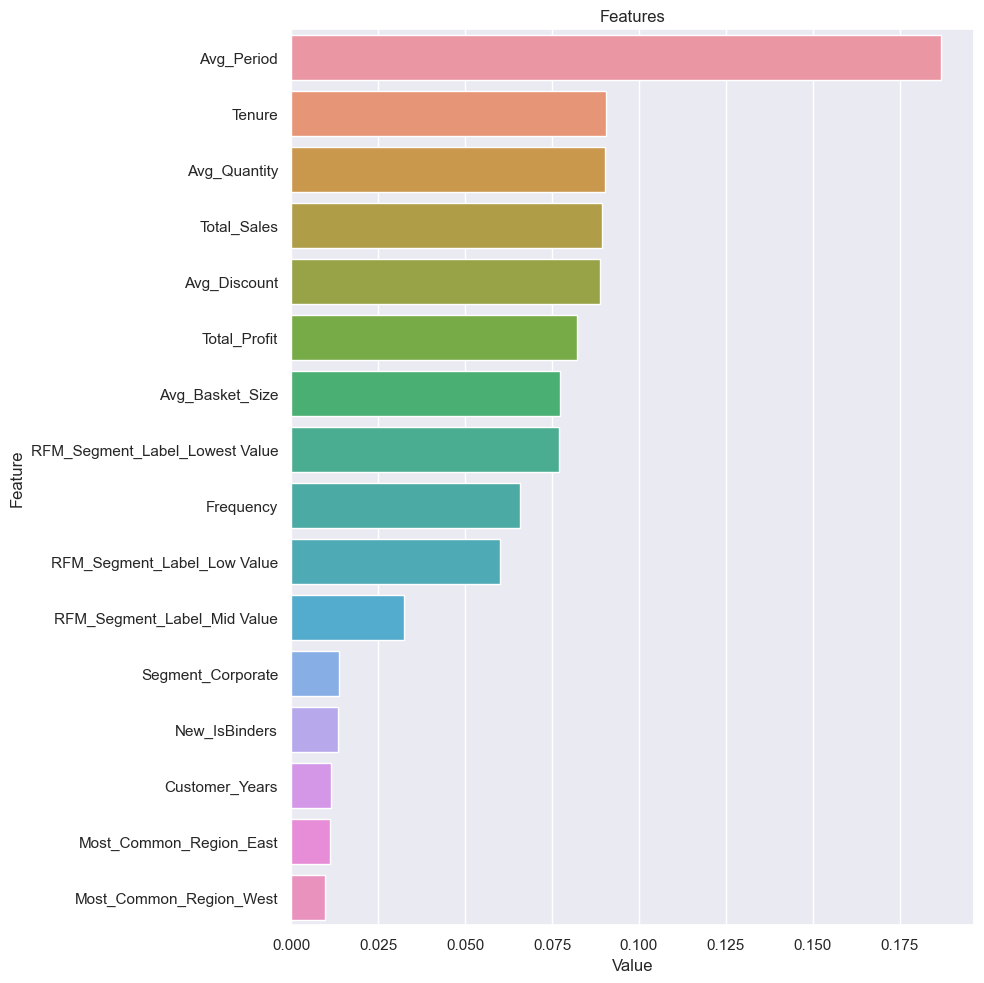

In [152]:
plot_importance(best_model_rf, X)

# RFE (Recursive Feature Elimination)
### 4.1) LGBM

In [153]:
X = dfr.drop(columns=['Churn'])
y = dfr['Churn'] 

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
lgb_model = LGBMClassifier(random_state=12345)

In [156]:
from sklearn.feature_selection import RFE

In [157]:
rfe = RFE(estimator=lgb_model, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 261, number of negative: 369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 630, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.414286 -> initscore=-0.346276
[LightGBM] [Info] Start training from score -0.346276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 261, number of negative: 369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 630, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.414286 -> initscore=-0.346276
[LightGBM] [Info] Start training from score -0.346276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RFE(estimator=LGBMClassifier(random_state=12345), n_features_to_select=10)

In [158]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [159]:
lgb_model.fit(X_train_rfe, y_train)

[LightGBM] [Info] Number of positive: 261, number of negative: 369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 630, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.414286 -> initscore=-0.346276
[LightGBM] [Info] Start training from score -0.346276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(random_state=12345)

In [160]:
y_pred = lgb_model.predict(X_test_rfe)

In [161]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy, 2)}")
print(f"Recall: {round(recall, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"F1: {round(f1, 2)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.74
Recall: 0.64
Precision: 0.72
F1: 0.68
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78        91
         1.0       0.72      0.64      0.68        67

    accuracy                           0.74       158
   macro avg       0.74      0.73      0.73       158
weighted avg       0.74      0.74      0.74       158



In [162]:
feature_names = X.columns
feature_importance = lgb_model.feature_importances_

In [163]:
sorted_idx = np.argsort(feature_importance)

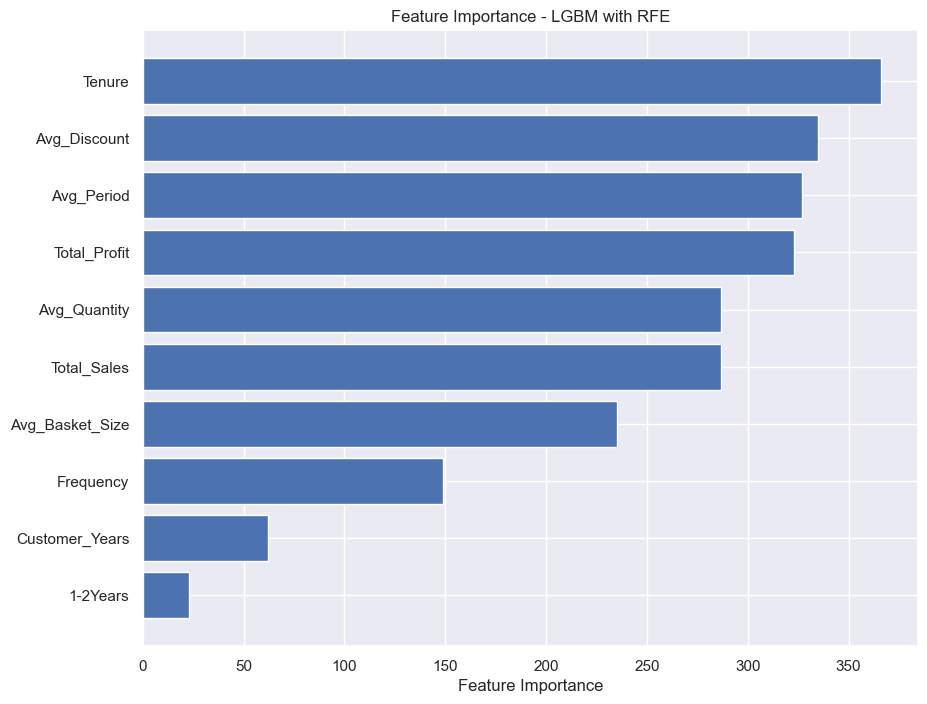

In [164]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - LGBM with RFE')
plt.show()

### 4.2) Catboost

In [165]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345)

In [166]:
rfe = RFE(estimator=catboost_model, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=<catboost.core.CatBoostClassifier object at 0x000001DCB4A60B50>,
    n_features_to_select=10)

In [167]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [168]:
catboost_model.fit(X_train_rfe, y_train)

In [169]:
y_pred = catboost_model.predict(X_test_rfe)

In [170]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy, 2)}")
print(f"Recall: {round(recall, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"F1: {round(f1, 2)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Recall: 0.66
Precision: 0.88
F1: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85        91
         1.0       0.88      0.66      0.75        67

    accuracy                           0.82       158
   macro avg       0.83      0.80      0.80       158
weighted avg       0.83      0.82      0.81       158



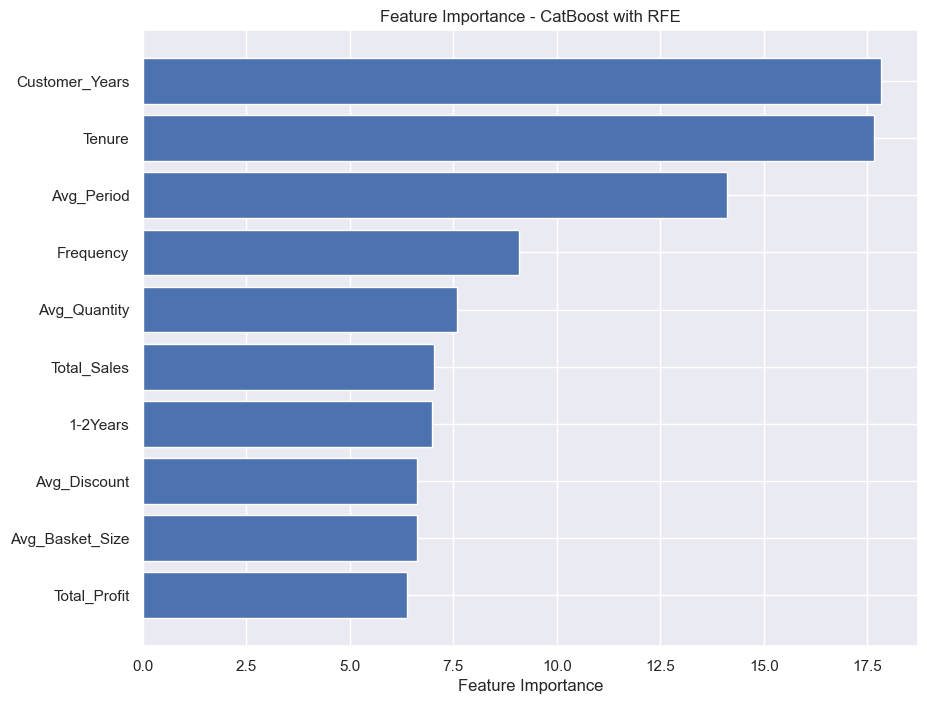

In [171]:
feature_importance = catboost_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - CatBoost with RFE')
plt.show()